<a href="https://colab.research.google.com/github/yashikart/Electric-Vehicle-Market-Segment/blob/main/ProblemStatement_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
car  = pd.read_excel('/content/car data.xlsx')
car

,Name,Model,Price,Review,Battery Capacity,Emission Norm Compliance\t\n,MaxTorque,MaxPower,Range,Charging Time
0,Tata Nexon EV,Nexon EV Creative Plus(Electric),"Rs. 17,12,807",3.3/5,Battery Capacity\t\n\n40.5 kWh,Emission Norm Compliance\t\n\nZEV,Max Torque205Nm,Max Power\t\n\n142.68bhp,Range\t\n\n465 Km,Charging Time\t\n\n6H -AC-7.2 kW (10-100%)
1,Tata Tiago EV,Tiago EV XE Base(Electric),"Rs. 9,90,758",4.6/5,Battery Capacity\t\n\n24 KWh,Emission Norm Compliance\t\n\nZEV,NaN,NaN,Range\t\n\n315 km/charge,Charging Time\t\n\n58 min| DC-25 kW(10-80%)
2,Kia EV6,EV6 GT line(Electric),"Rs. 71,37,900",4.0/5,Battery Capacity\t\n\n77.4 kWh,Emission Norm Compliance\t\n\nZEV,Max Torque\t\n\n605Nm,Max Power\t\n\n320.55bhp,Range\t\n\n708 km,Charging Time\t\n\n18 Min (0-80%)
3,Mahindra XUV400 EV,XUV400 EV EC(Electric),"Rs. 18,57,178",4.4/5,Battery Capacity\t\n\n39.4 kWh,Emission Norm Compliance\t\n\nZEV,Max Torque310Nm,Max Power\t\n\n147.51bhp,Range\t\n\n456 kms,Charging Time\t\n\n6H 30 Min-AC-7.2 kW (0-100%)
4,BMW i7,i7 xDrive60 M Sport(Electric),"Rs. 2,29,30,880",5.0/5,Battery Capacity\t\n\n101.7kWh,Emission Norm Compliance\t\n\nZEV,Max Torque745Nm,Max Power\t\n\n536.40bhp,Range\t\n\n560 KM,NaN
5,MG Comet EV,Comet EV Pace(Electric),"Rs. 8,46,895",3.6/5,Battery Capacity\t\n\n17.3 kWh,Emission Norm Compliance\t\n\nZEV,NaN,NaN,Range\t\n\n230 Km,Charging Time\t\n\n7 Hours
6,Tata Tigor EV,Tigor EV XE(Electric),"Rs. 14,46,728",4.8/5,Battery Capacity\t\n\n26 kWh,Emission Norm Compliance\t\n\nZEV,Max Torque170Nm,Max Power\t\n\n73.75bhp,Range\t\n\n315 km/charge,Charging Time\t\n\n59 min| DC-25 kW(10-80%)
7,BMW iX,iX xDrive40(Electric),"Rs. 1,36,68,160",4.2/5,Battery Capacity\t\n\n71 kW,Emission Norm Compliance\t\n\nZEV,Max Torque\t\n\n630Nm,Max Power\t\n\n321.84bhp,Range\t\n\n425KM,Charging Time\t\n\n7H 15min-(0-100%)
8,Hyundai Kona Electric,Kona Electric Premium(Electric),"Rs. 25,71,091",4.0/5,Battery Capacity\t\n\n39.2 kWh,Emission Norm Compliance\t\n\nZEV,Max Torque\t\n\n395Nm,Max Power\t\n\n134.10bhp,Range\t\n\n452 km,Charging Time\t\n\n19 h - AC - 2.8 kW (0-100%)
9,MG ZS EV,ZS EV Excite(Electric),"Rs. 24,33,885",4.2/5,Battery Capacity\t\n\n50.3 kWh,Emission Norm Compliance\t\n\nZEV,Max Torque\t\n\n280Nm,Max Power\t\n\n174.33bhp,Range\t\n\n461km,Charging Time\t\n\n8.5 To 9 Hours


In [ ]:
car.columns

Index(['Name', 'Model', 'Price', 'Review', 'Battery Capacity',
       'Emission Norm Compliance\t\n', 'MaxTorque', 'MaxPower', 'Range',
       'Charging Time'],
      dtype='object')

In [ ]:
car['Name'] = car['Name'].str.split(' ').str[0]
car.rename(columns={'Name': "Company Name"}, inplace=True)

In [ ]:
car['Model'] = car['Model'].str.replace('(','').str.replace(')','').str.replace('Electric','')

<ipython-input-9-e1e7a2fbb287>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car['Model'] = car['Model'].str.replace('(','').str.replace(')','').str.replace('Electric','')


In [ ]:
car['Model'].unique()

array(['Nexon EV Creative Plus', 'Tiago EV XE Base', 'EV6 GT line',
       'XUV400 EV EC', 'i7 xDrive60 M Sport', 'Comet EV Pace',
       'Tigor EV XE', 'iX xDrive40', 'Kona  Premium', 'ZS EV Excite',
       'Eletre Base', 'i4 eDrive35 M Sport', 'EQS 580 4Matic', 'eC3 Live',
       'Atto 3 ', 'e-tron 50', 'E6 ', 'e-tron GT Quattro',
       'Taycan Standard', 'I-Pace SE', 'RS e-tron GT Quattro', 'EaS E ',
       'EQB 350 4Matic', 'XC40 Recharge P8 AWD', 'R3 2-Door',
       'Cooper SE ', 'IONIQ 5 Long Range RWD', 'iX1 xDrive30 M Sport',
       'C40 Recharge E80', 'EQE SUV 500 4MATIC', 'Q8 e-tron 50 Quattro',
       'DEFY Hacker Edition', 'AMG EQS 53 4Matic Plus',
       'Q8 Sportback e-tron 50 Quattro'], dtype=object)

In [ ]:
car['Price'] = car['Price'].str.replace('Rs. ','').str.replace(',','').astype('int')

<ipython-input-11-39583b842740>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car['Price'] = car['Price'].str.replace('Rs. ','').str.replace(',','').astype('int')


In [ ]:
car['Review'] = car['Review'].str.split('/').str[0].str.replace('No one has rated or written review till now','0').str.replace('Based on 8 review','0').str.replace('Based on 1 review','0').str.replace('0s','0').astype('float')

In [ ]:
car['Battery Capacity'] = car['Battery Capacity'].str.replace("Battery Capacity",'').str.split('\n').str[-1].fillna(0)


In [ ]:
car.rename(columns={'MaxTorque': "MaxTorque(Nm)"}, inplace=True)

In [ ]:
car['MaxTorque(Nm)'] = car['MaxTorque(Nm)'].str.replace('Max Torque','').str.replace('Nm','').str.split('\n').str[-1].str.replace('270@1000rpm','270').fillna(0).astype(int)


In [ ]:
car.rename(columns={'MaxPower': "MaxPower(bhp)"}, inplace=True)

In [ ]:
car['MaxPower(bhp)'] = car['MaxPower(bhp)'].str.replace('kW', '').str.replace('Max Power', '').str.replace('bhp', '').str.split('\n').str[2].fillna(0).astype(float)

In [ ]:
car.rename(columns={'Range': "Range(km)"}, inplace=True)


In [ ]:
car['Range(km)'] = car['Range(km)'].str.split('\n').str[-1].str.split(" ").str[0].str.replace('km','').str.replace('KM','').str.replace('Km','').fillna(0)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
car.columns

Index(['Company Name', 'Model', 'Price', 'Review', 'Battery Capacity',
       'Emission Norm Compliance\t\n', 'MaxTorque(Nm)', 'MaxPower(bhp)',
       'Range(km)', 'Charging Time'],
      dtype='object')

In [ ]:
fig = px.bar(car, x="Company Name", y="Price",
             title="Electric car companies' prices in India")

fig.show()

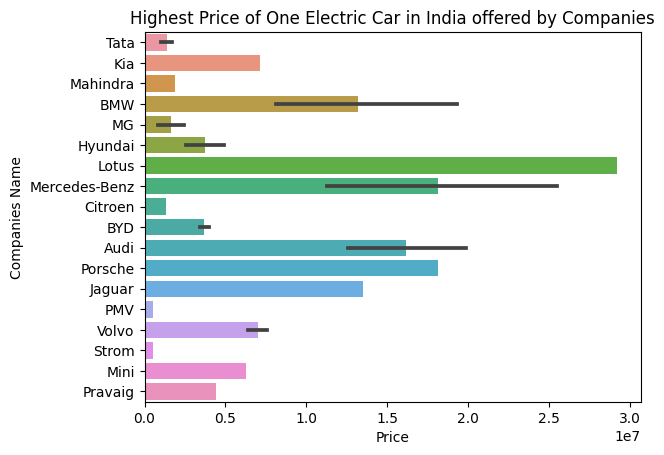

In [ ]:
sns.barplot(x=car['Price'],y=car['Company Name'])
plt.title("Highest Price of One Electric Car in India offered by Companies")
plt.xlabel("Price")
plt.ylabel("Companies Name")
plt.show()

In [ ]:
car = car.drop(['Emission Norm Compliance\t\n'], axis=1)

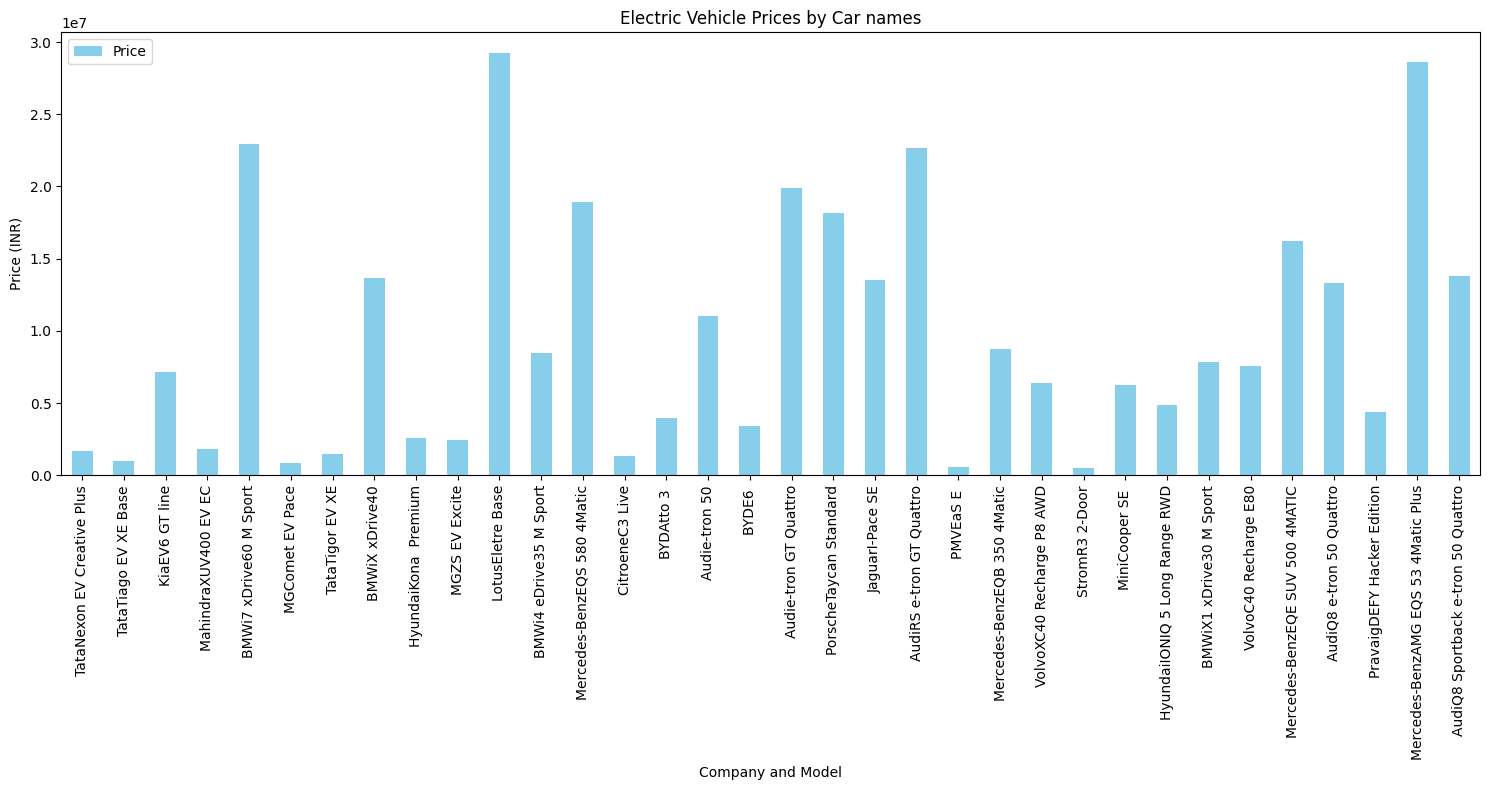

In [ ]:
car['Combined'] = car['Company Name']+ car['Model']
fig, ax = plt.subplots(figsize=(15, 8))
car.plot(kind='bar', x='Combined', y='Price', ax=ax, color='skyblue')
plt.title('Electric Vehicle Prices by Car names')
plt.xlabel('Company and Model')
plt.ylabel('Price (INR)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
car['Range(km)'] = car['Range(km)'].str.split("–").str[0]
car['Range(km)'] = car['Range(km)'].str.split("-").str[0].astype(int)

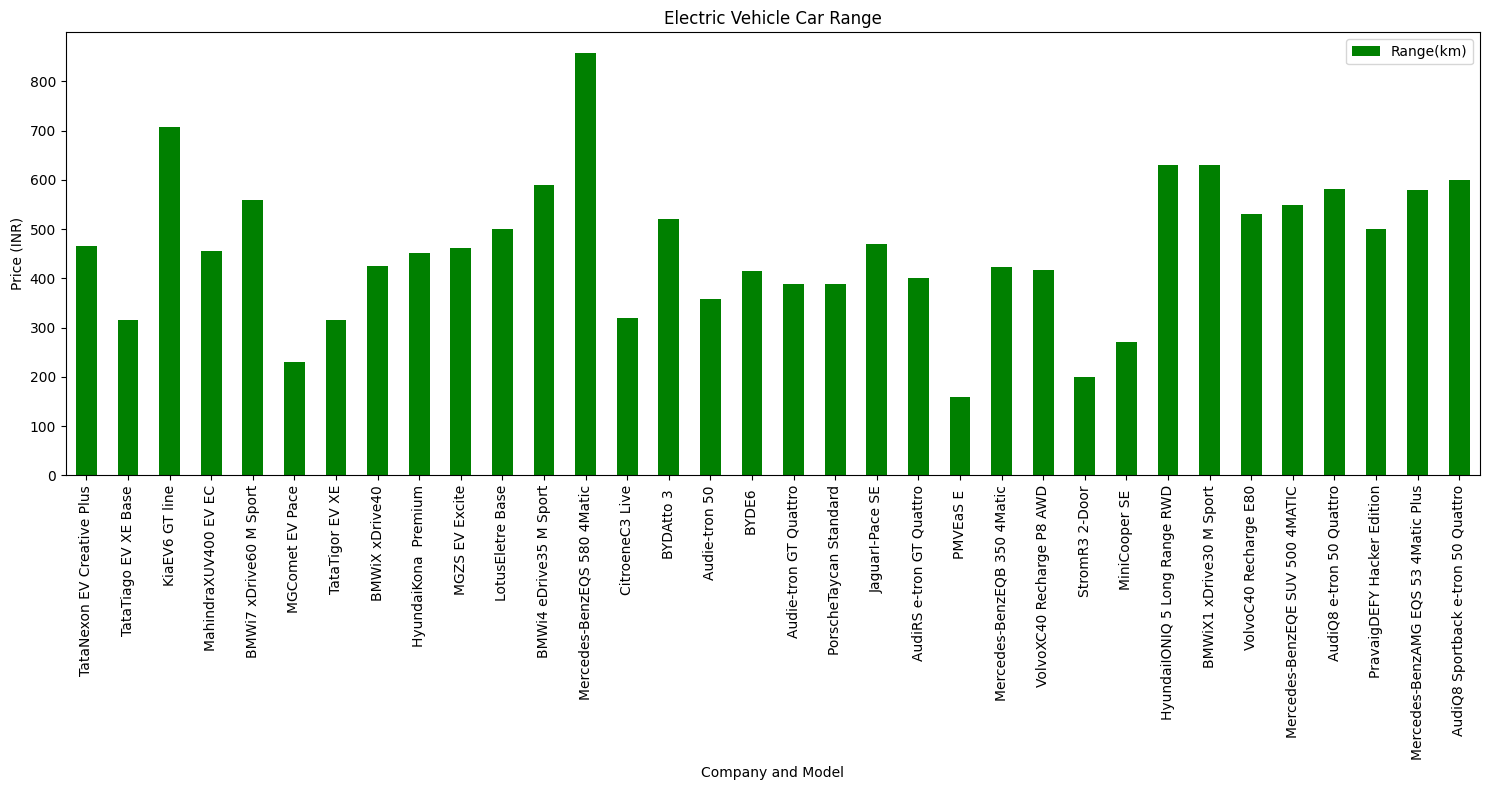

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
car.plot(kind='bar', x='Combined', y='Range(km)', ax=ax,color='green')
plt.title('Electric Vehicle Car Range')
plt.xlabel('Company and Model')
plt.ylabel('Price (INR)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

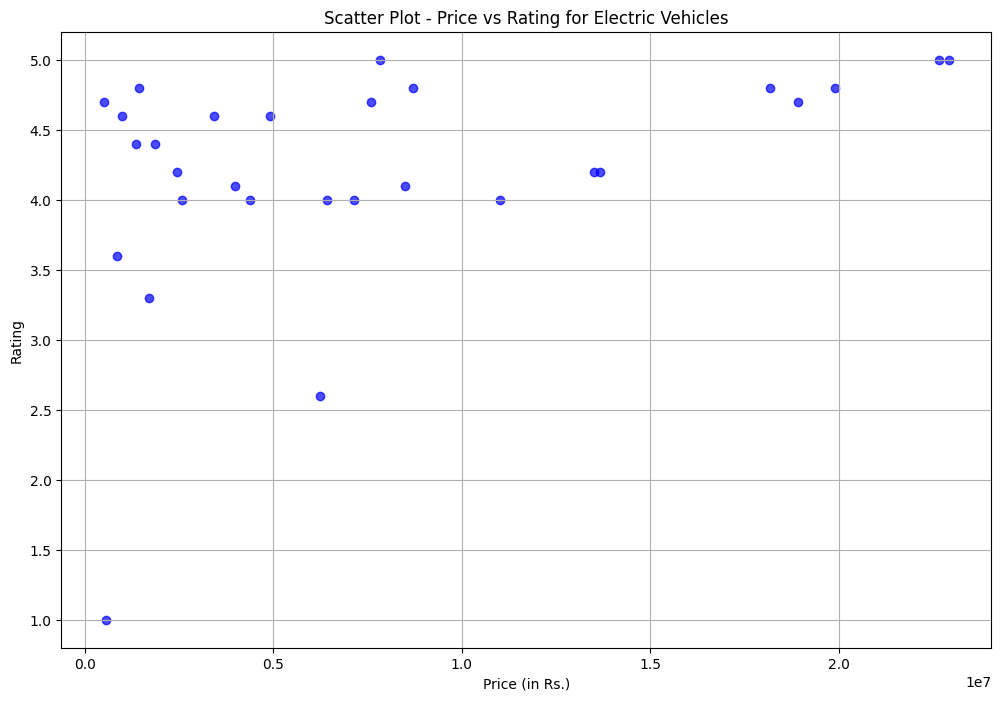

In [ ]:
new_df = car[(car['Review']!= 0 )]
plt.figure(figsize=(12, 8))
plt.scatter(new_df["Price"], new_df["Review"], color='b', alpha=0.7)
plt.title('Scatter Plot - Price vs Rating for Electric Vehicles')
plt.xlabel('Price (in Rs.)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

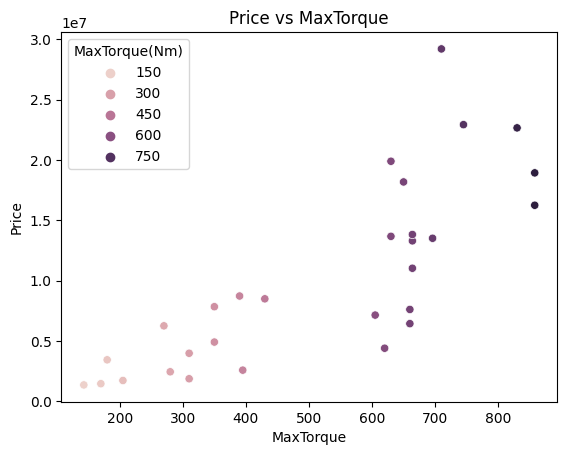

In [ ]:
new_df = car[(car['MaxTorque(Nm)']!= 0 ) & (car['MaxPower(bhp)']!= 0)]
sns.scatterplot(y="Price", x="MaxTorque(Nm)",hue='MaxTorque(Nm)',data=new_df)
plt.title("Price vs MaxTorque")
plt.xlabel("MaxTorque")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Price')

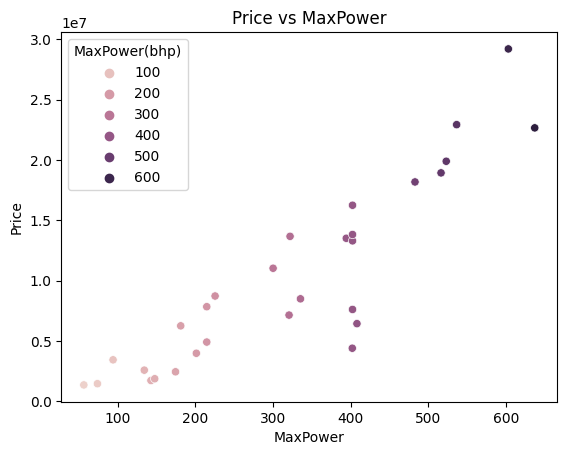

In [ ]:
sns.scatterplot(y="Price", x="MaxPower(bhp)",hue='MaxPower(bhp)',data=new_df)
plt.title("Price vs MaxPower")
plt.xlabel("MaxPower")
plt.ylabel("Price")

<ipython-input-31-7ac88243830f>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



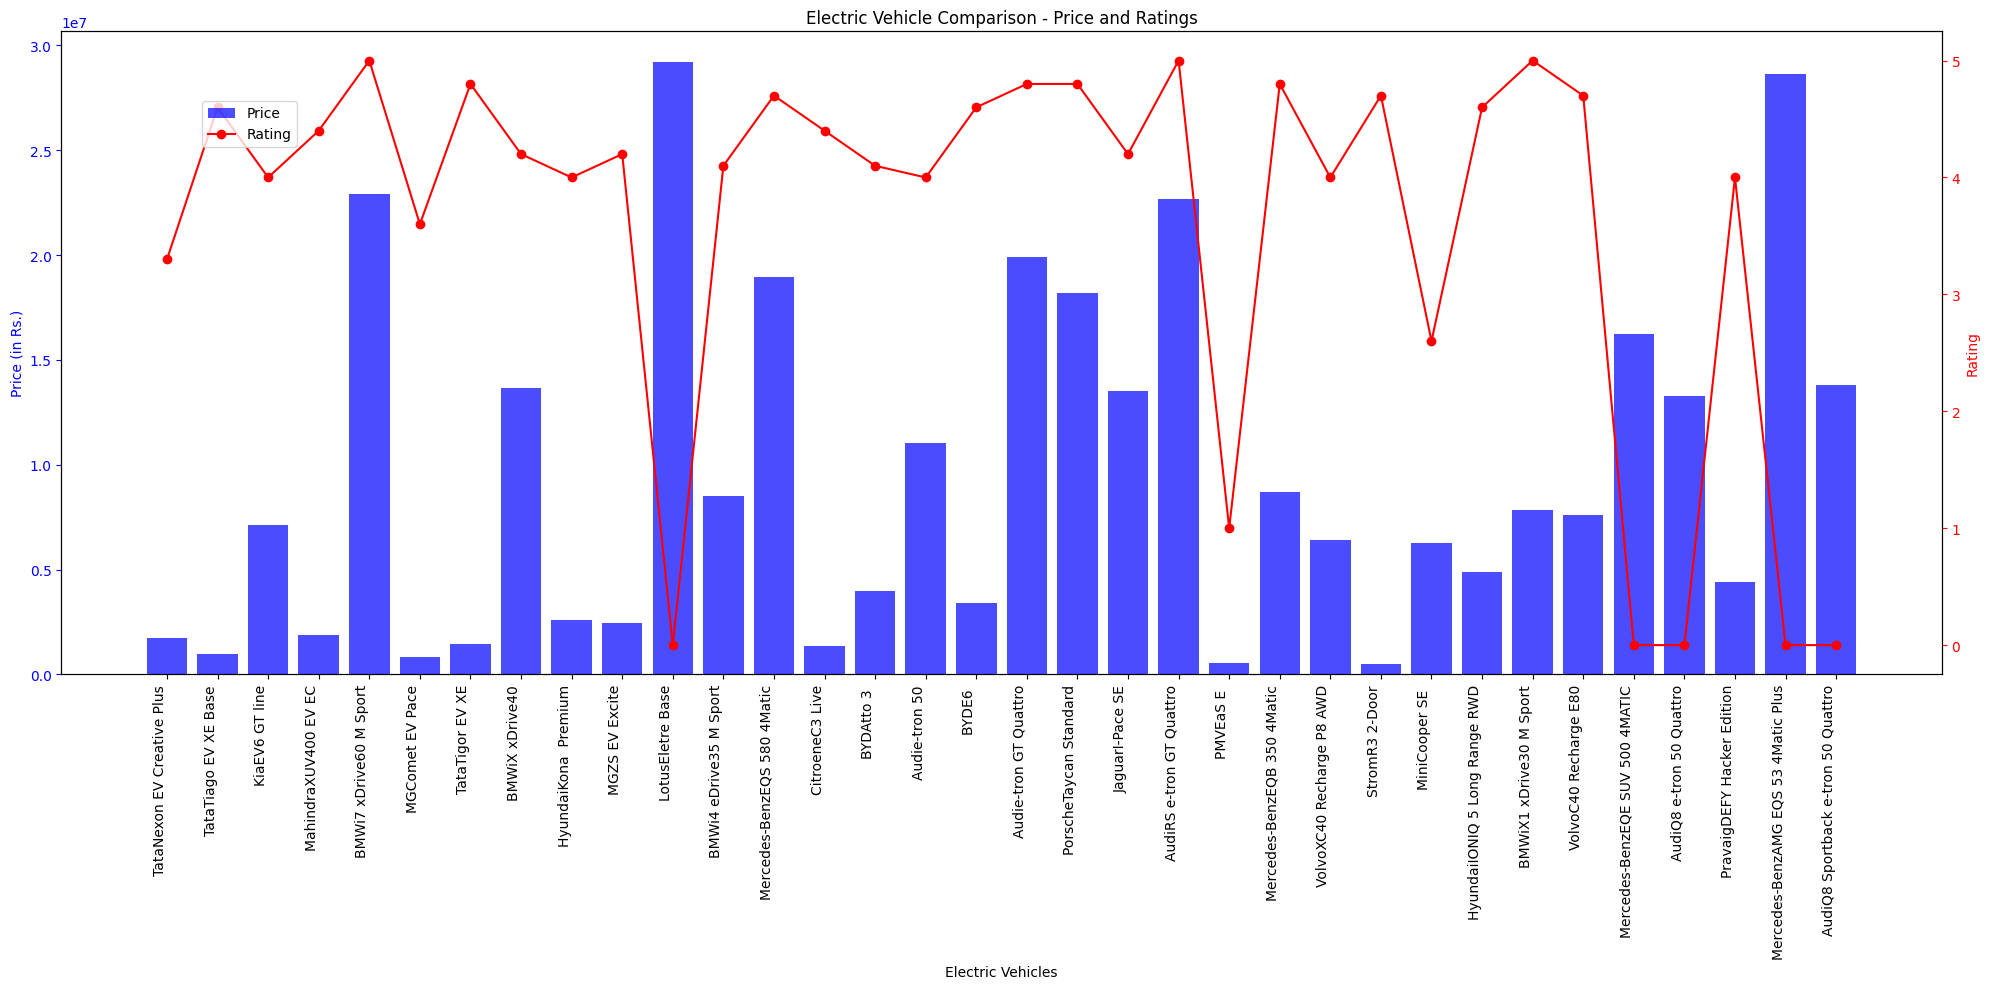

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))

# Bar plot for Price
ax1.bar(car["Combined"], car["Price"], color='b', alpha=0.7, label='Price')
ax1.set_xlabel('Electric Vehicles')
ax1.set_ylabel('Price (in Rs.)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(car["Combined"], rotation=90, ha='right')

# Create a second y-axis to plot Ratings
ax2 = ax1.twinx()
ax2.plot(car["Combined"], car["Review"], color='r', marker='o', label='Rating')
ax2.set_ylabel('Rating', color='r')
ax2.tick_params('y', colors='r')

# Title and legend
plt.title('Electric Vehicle Comparison - Price and Ratings')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

In [ ]:
car['Battery Capacity'] = car['Battery Capacity'].str.split(' ').str[0].str.replace('kWh','').str.replace('KWh','').str.replace('KWH','').str.replace('wh','').str.replace('K','').str.replace('k','').fillna(0).astype(float)

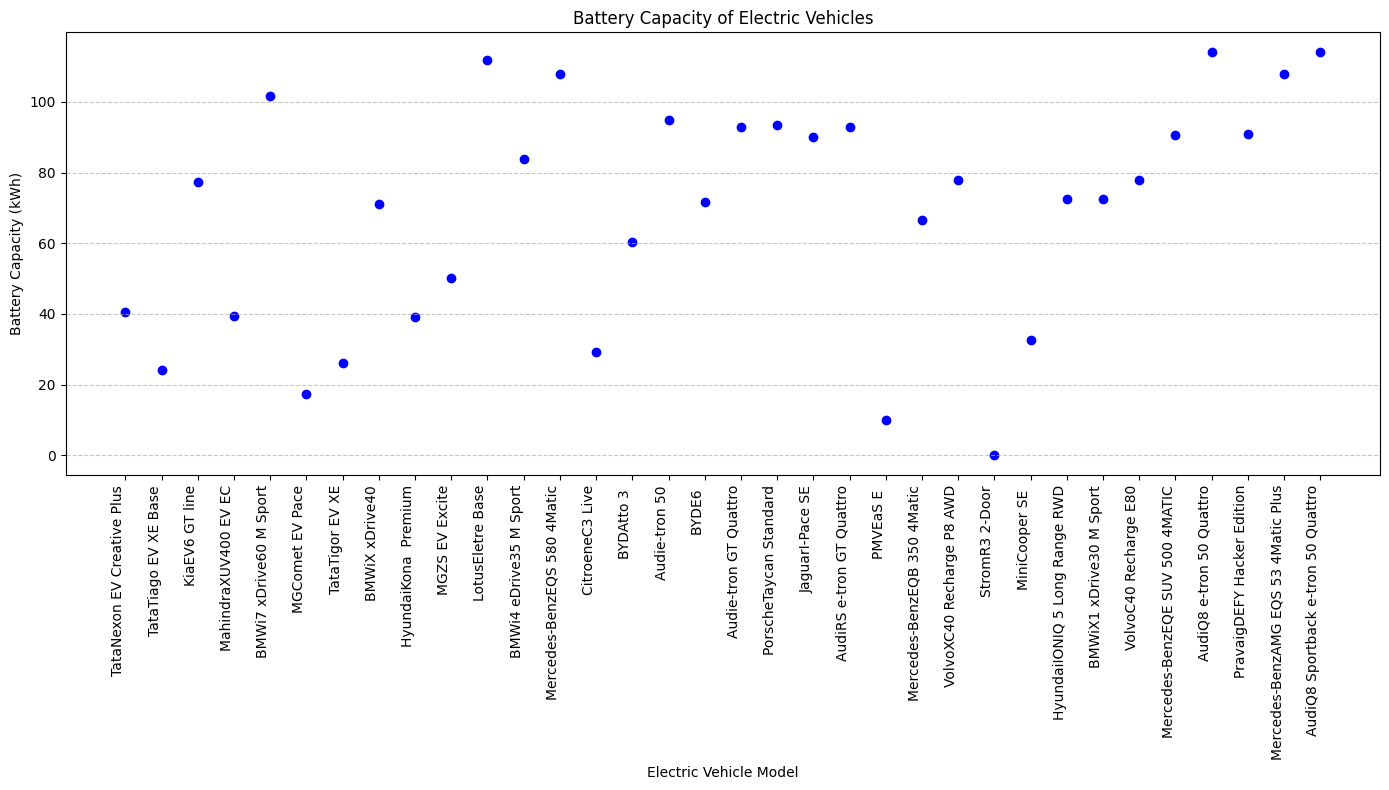

In [ ]:
df_cleaned = car.dropna(subset=['Battery Capacity'])
plt.figure(figsize=(14, 8))
plt.scatter(df_cleaned["Combined"], df_cleaned["Battery Capacity"], color='blue')
plt.title('Battery Capacity of Electric Vehicles')
plt.xlabel('Electric Vehicle Model')
plt.ylabel('Battery Capacity (kWh)')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
scooter = pd.read_excel('/content/scooter.xlsx')

In [ ]:
scooter

,Name,Model,Price,Rating,Ground Clearance,Charging Time,Motor Type,TopSpeed,WheelsType,Range,Motor Power,Battery Capacity
0,Ola S1 Pro,S1 Pro Gen 1,"Rs. 1,48,758",3.9/5,Ground Clearance\t\n\n165 mm,Charging Time\t\n\n6.5 Hr,Motor Type\t\n\nMid Drive IPM,Top Speed\t\n\n120 km/hr,Wheels Type\t\n\nAluminium Alloy,Range\t\n\n195 km/charge,Motor Power\t\n\n11000,NaN
1,TVS iQube,iQube Electric STD,"Rs. 1,63,222",4.1/5,Ground Clearance\t\n\n157 mm,Charging Time\t\n\n2 Hour 50 Min - 80%,Motor Type\t\n\nBLDC,Top Speed\t\n\n78 km/hr,Wheels Type\t\n\nAlloy,Range\t\n\n100 km/charge,Motor Power\t\n\n4400,NaN
2,Ather 450X,450X 2.9 kWh,"Rs. 1,46,038",4.2/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bajaj Chetak,Chetak Premium 2023,"Rs. 1,25,375",4.1/5,Ground Clearance\t\n\n160 mm,Charging Time\t\n\n5 Hr,Motor Type\t\n\nBLDC,Top Speed\t\n\n63 km/hr,Wheels TypeAlloy,Range\t\n\n108 km/charge,Motor Power\t\n\n4200 W,Battery Capacity\t\n\n2.9 Kwh
4,Vida V1 Pro,V1 Pro STD,"Rs. 1,51,777",4.6/5,Ground Clearance\t\n\n155 mm,Charging Time\t\n\n6 Hr,Motor Type\t\n\nPMSM,Top Speed\t\n\n80 km/hr,Wheels Type\t\n\nAlloy,Range\t\n\n110 km/charge,Motor Power\t\n\n6000,NaN
5,Hero Electric Optima,Optima CX 2.0,"Rs. 1,10,753",3.9/5,Ground Clearance\t\n\n165 mm,Charging Time\t\n\n6.5 Hr,Motor Type\t\n\nBLDC,Top Speed\t\n\n55 km/hr,Wheels Type\t\n\nAlloy,Range\t\n\n135 km/charge,Motor Power\t\n\n1200,NaN
6,BattRE Electric Storie,Storie STD,"Rs. 1,21,727",4.4/5,NaN,NaN,NaN,NaN,Wheels Type\t\n\nAlloy,Range\t\n\n132 km/charge,NaN,Battery Capacity\t\n\n3.1 Kwh
7,Ola S1 Air,S1 Air STD,"Rs. 1,24,412",3.1/5,Ground Clearance\t\n\n165 mm,Charging Time\t\n\n5 Hr,Motor Type\t\n\nHub motor,Top Speed\t\n\n90 km/hr,Wheels Type\t\n\nAluminium Alloy,Range\t\n\n151 km/charge,NaN,NaN
8,Simple One,One Single Tone,"Rs. 1,53,848",4.4/5,Ground Clearance\t\n\n164.5 mm,Charging Time\t\n\n1 Hr,Motor Type\t\n\nPMSM,Top Speed\t\n\n105 km/hr,Wheels Type\t\n\nAlloy,Range\t\n\n212 km/charge,Motor Power\t\n\n8500,Battery Capacity\t\n\n5 Kwh
9,Ola S1 X,S1 X 2kWh,"Rs. 94,878",4.5/5,NaN,Charging Time\t\n\n7.4 Hr,NaN,Top Speed\t\n\n90 km/hr,Wheels Type\t\n\nAlloy,Range\t\n\n151 km/charge,Motor Power\t\n\n6000,NaN


In [ ]:
scooter.columns

Index(['Name', 'Model', 'Price', 'Rating', 'Ground Clearance', 'Charging Time',
       'Motor Type', 'TopSpeed', 'WheelsType', 'Range', 'Motor Power',
       'Battery Capacity'],
      dtype='object')

In [ ]:
scooter['Name'] = scooter['Name'].str.split(' ').str[0]

In [ ]:
scooter['Scooter Name'] = scooter['Name'] + scooter['Model']

In [ ]:
scooter['Price'] = scooter['Price'].str.split(' ').str[-1].str.replace(',', '').astype(int)

In [ ]:
scooter['Rating'] = scooter['Rating'].str.split('/').str[0].str.replace('No one has rated or written review till now','0').str.replace('Based on 8 review','0').str.replace('Based on 1 review','0').str.replace('0s','0').astype('float')

In [ ]:
scooter['Ground Clearance'] = scooter['Ground Clearance'].str.split('\n').str[-1].str.replace('mm','').astype(float)

In [ ]:
scooter['Charging Time'] = scooter['Charging Time'].str.split('\n').str[-1]

In [ ]:
scooter['Motor Type'] = scooter['Motor Type'].str.split('\n').str[-1].str.replace('Motor Type','')

In [ ]:
scooter['TopSpeed'] = scooter['TopSpeed'].str.split('\n').str[-1].str.split(" ").str[0]

In [ ]:
scooter['WheelsType'] = scooter['WheelsType'].str.split('\n').str[-1].str.replace('Wheels Type','')

In [ ]:
scooter['Range'] = scooter['Range'].str.split('\n').str[-1].str.split(" ").str[0]

In [ ]:
scooter['Motor Power'] = scooter['Motor Power'].str.split('\n').str[-1].str.replace('Motor Power','').str.split(" ").str[0]

In [ ]:
scooter['Battery Capacity'] = scooter['Battery Capacity'].str.split('\n').str[-1].str.split(" ").str[0]

In [ ]:
scooter['Range'] = scooter['Range'].str.split("–").str[0]
scooter['Range'] = scooter['Range'].str.split("-").str[0].fillna(0).astype(int)

In [ ]:
scooter['Motor Power'] = scooter['Motor Power'].fillna(0).astype(int)

In [ ]:
scooter['Charging Time'] = scooter['Charging Time'].astype('category')

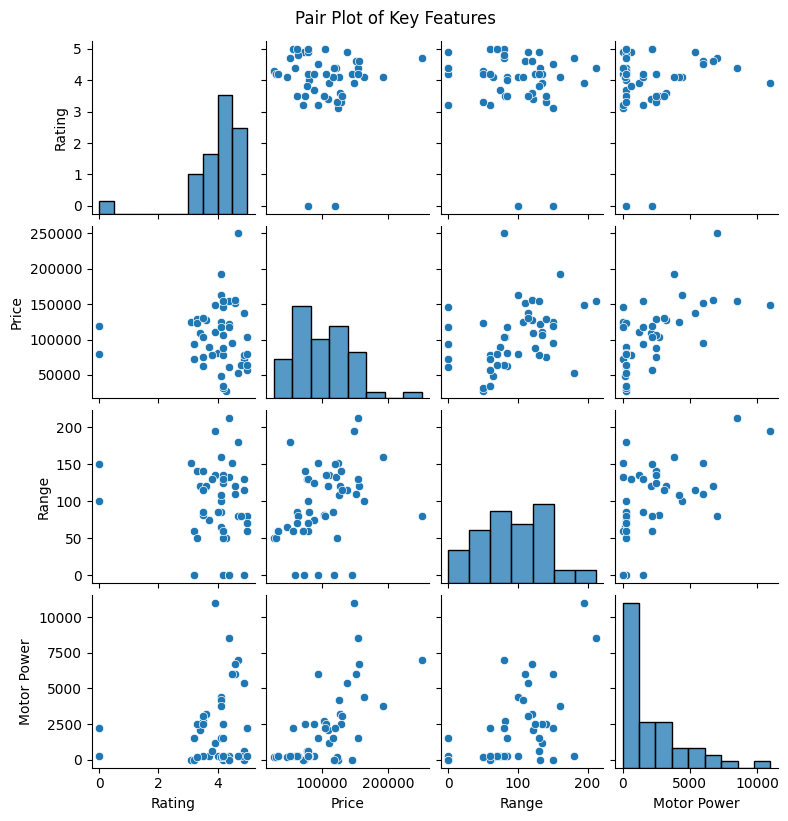

In [ ]:
sns.pairplot(data=scooter[['Rating', 'Price', 'Range', 'Motor Power', 'Charging Time']], height=2)
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

In [ ]:
scooter['Motor Type'] = scooter['Motor Type'].astype('category')

In [ ]:
scooter['Charging Time'] = scooter['Charging Time'].str.replace('hours','Hr').str.replace('Hour','Hr').str.replace('minutes','Min')

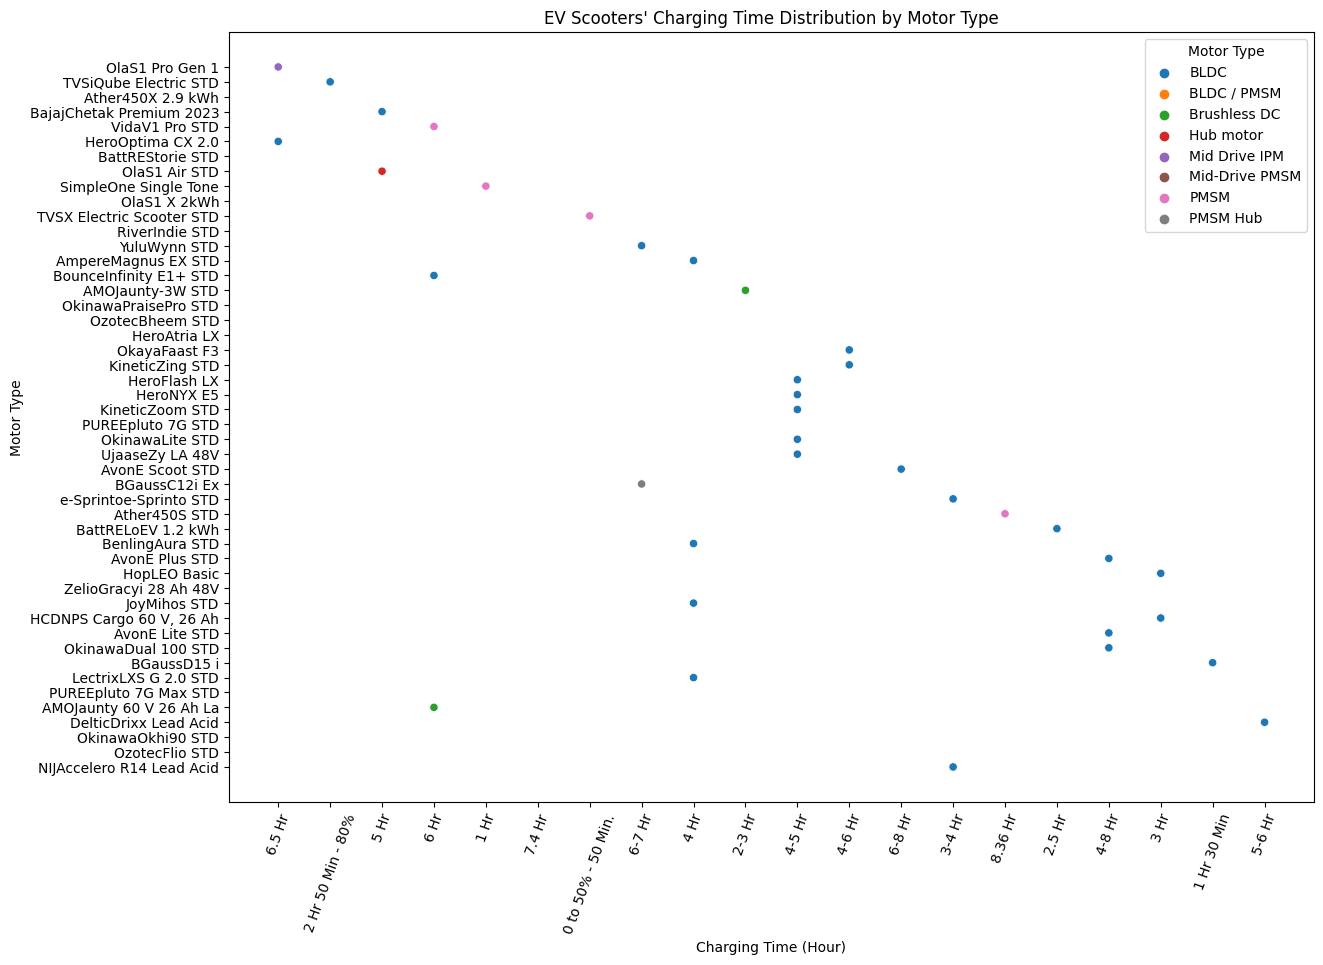

In [ ]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=scooter,y='Scooter Name',x='Charging Time',hue='Motor Type')
plt.title("EV Scooters' Charging Time Distribution by Motor Type")
plt.xlabel('Charging Time (Hour)')
plt.ylabel('Motor Type')
plt.xticks(rotation=70)
plt.show()

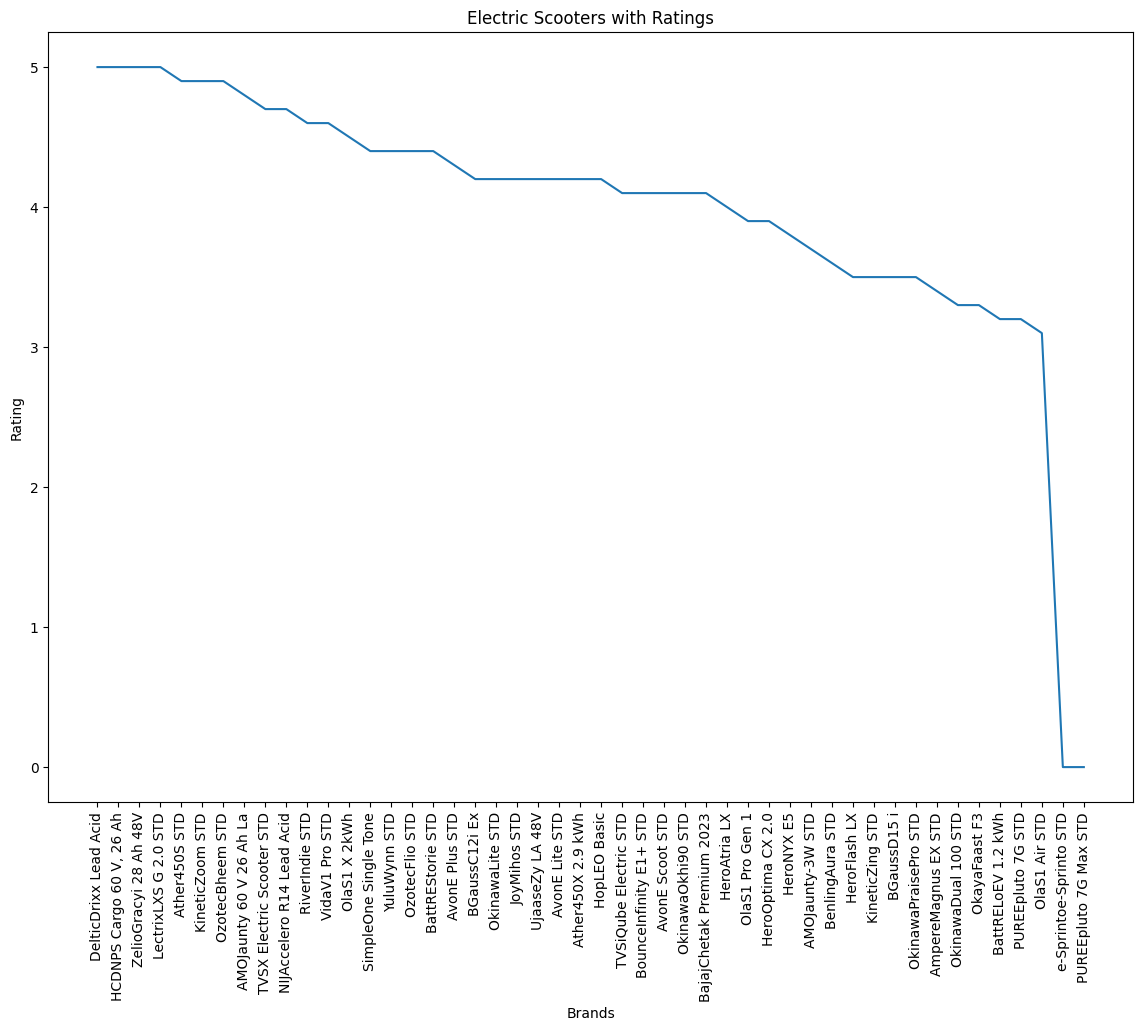

In [ ]:
top_rated_cars = scooter.sort_values(by='Rating', ascending=False)
plt.figure(figsize=(14, 10))
sns.lineplot(data=top_rated_cars, y='Rating', x='Scooter Name')
plt.title('Electric Scooters with Ratings')
plt.xlabel('Brands')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

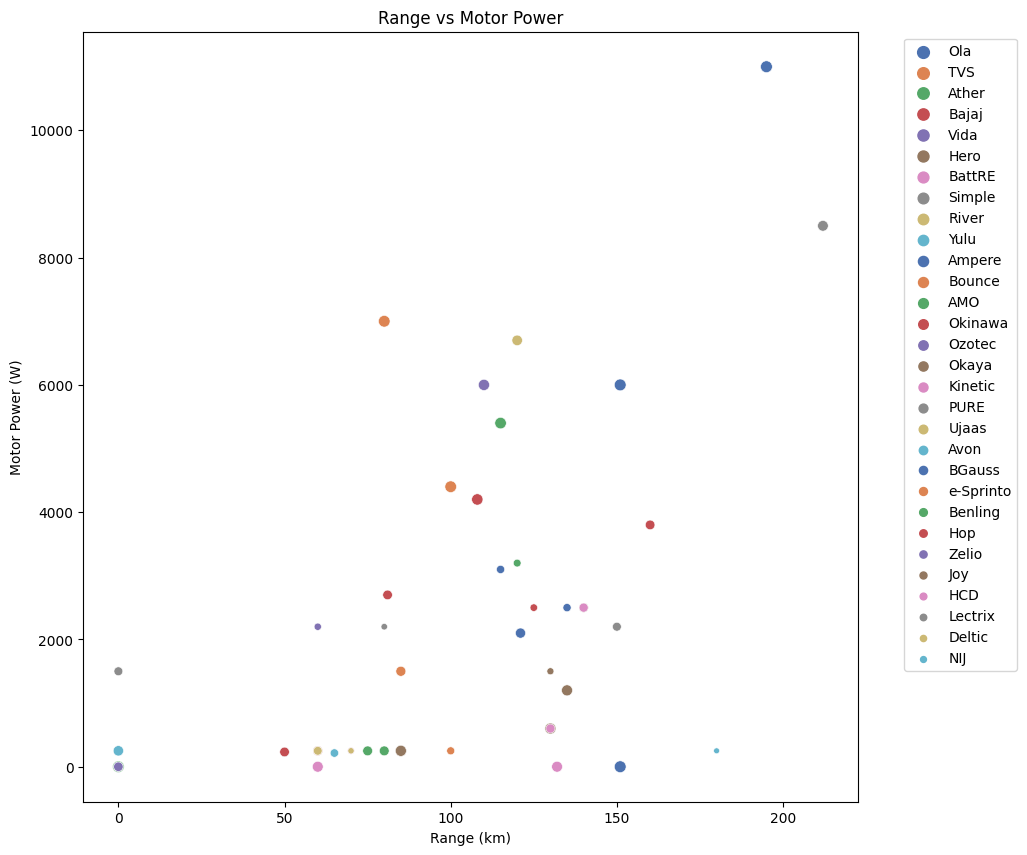

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=scooter, x='Range', y='Motor Power', hue='Name',palette="deep",size="Name")
plt.title('Range vs Motor Power')
plt.xlabel('Range (km)')
plt.ylabel('Motor Power (W)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

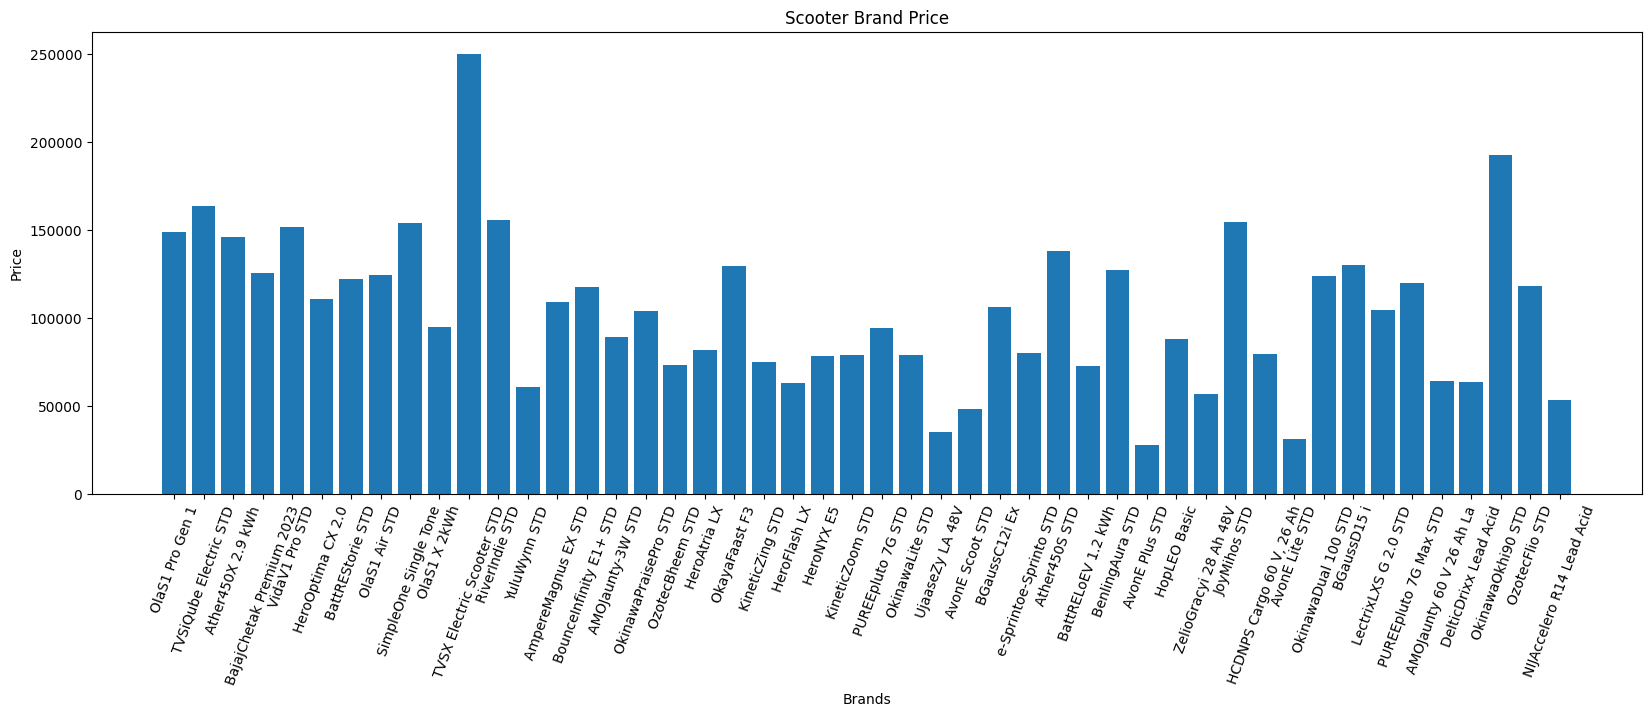

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(data=scooter, height='Price', x='Scooter Name')
plt.title('Scooter Brand Price')
plt.xlabel('Brands')
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()

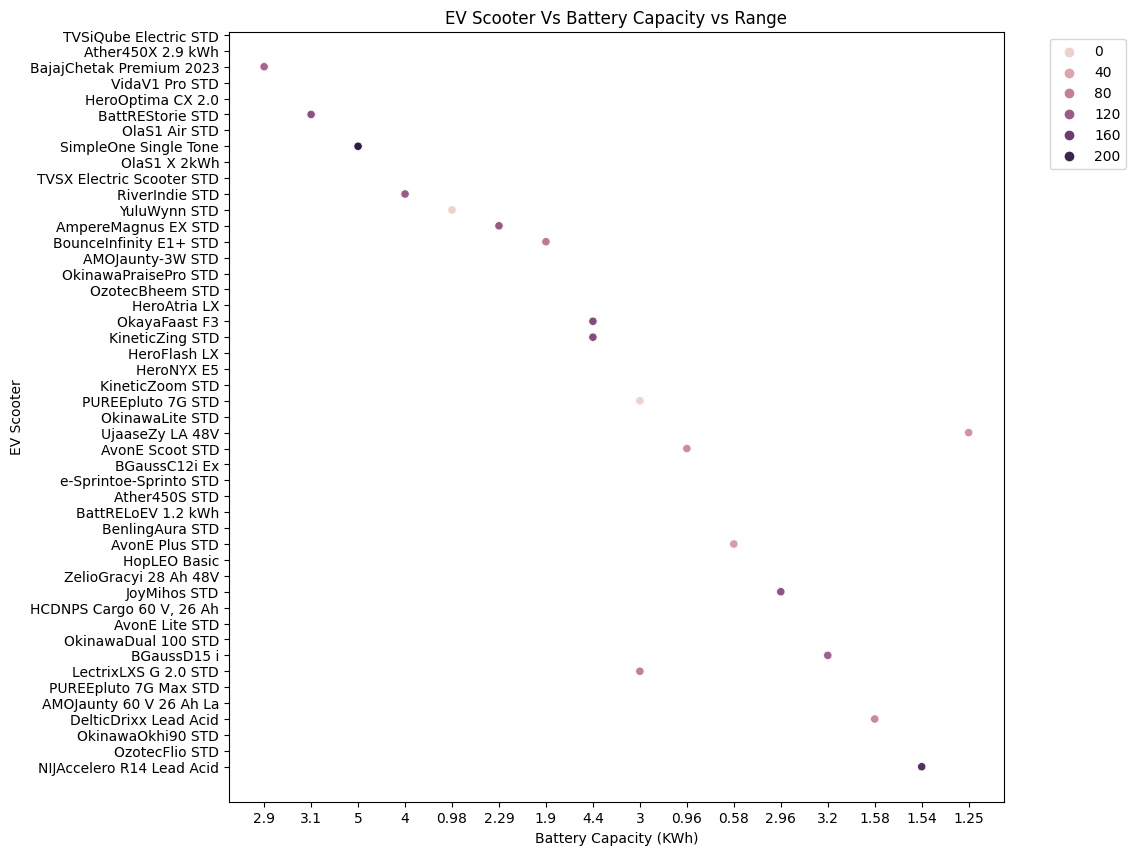

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=scooter, x='Battery Capacity', y='Scooter Name', hue='Range')
plt.title('EV Scooter Vs Battery Capacity vs Range')
plt.xlabel('Battery Capacity (KWh)')
plt.ylabel('EV Scooter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

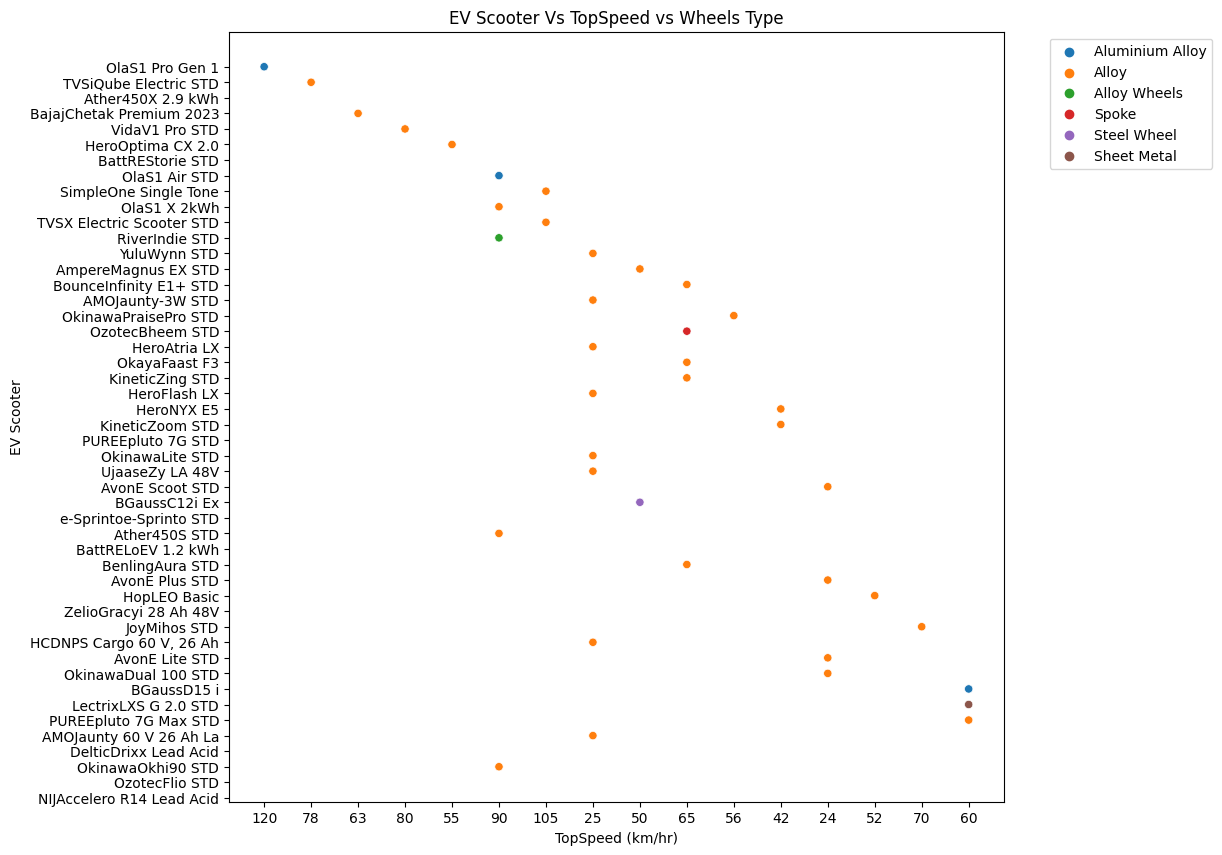

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=scooter, x='TopSpeed', y='Scooter Name', hue='WheelsType')
plt.title('EV Scooter Vs TopSpeed vs Wheels Type')
plt.xlabel('TopSpeed (km/hr)')
plt.ylabel('EV Scooter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
cycle = pd.read_excel('/content/Cycle.xlsx')
cycle

,Name,Model,Price,Ratings,Range,Wheel Type,Motor Power,Motor Type,Top Speed,Charging Time,Unnamed: 10
0,Motovolt Urbn e-Bike,Urbn e-Bike STD,"Rs. 53,276",4.0/5,NaN,Wheels Type\t\n\nAlloy,Motor Power\t\n\n250,Motor Type\t\n\nBrush Less DC,Top Speed\t\n\n25 km/hr,Charging Time\t\n\n4-5 Hr,NaN
1,Essel Energy GET 1,GET 1 11AH Li,"Rs. 40,574",3.8/5,Range\t\n\n40-50 km/charge,Wheels Type\t\n\nSpoke,Motor Power\t\n\n250,Motor Type\t\n\nBLDC,Top Speed\t\n\n25 km/hr,Charging Time\t\n\n5-6 Hr,Battery Capacity
2,EMotorad Doodle,Doodle STD,"Rs. 49,719",5.0/5,Range\t\n\n50 km/charge,NaN,Motor Power\t\n\n250,Motor Type\t\n\nBefang Mid Drive Motor,NaN,NaN,NaN
3,EMotorad Nighthawk,Nighthawk STD,"Rs. 5,10,579",No one has rated or written review till now.,NaN,Wheels Type\t\n\nSpoke,Motor Power\t\n\n250,Motor Type\t\n\nBLDC,Top Speed\t\n\n25 km/hr,Charging Time\t\n\n4-5 Hr,NaN
4,Essel Energy GET 7,GET 7 11AH Li,"Rs. 46,671",4.1/5,Range\t\n\n70-80 km/charge,Wheels Type\t\n\nSpoke,Motor Power\t\n\n250,Motor Type\t\n\nBLDC,Top Speed\t\n\n25 km/hr,NaN,NaN
5,SVITCH XE,XE Lite,"Rs. 81,730",3.4/5,Range\t\n\n80 km/charge,Wheels Type\t\n\nSpoke,Motor Power\t\n\n250,Motor Type\t\n\nBLDC Hub,Top Speed\t\n\n25 km/hr,NaN,NaN
6,SVITCH XE+,XE+ STD,"Rs. 1,14,249",3.8/5,Range\t\n\n120 km/charge,Wheels Type\t\n\nSpoke,Motor Power\t\n\n250,Motor Type\t\n\nBLDC,Top Speed\t\n\n25 km/hr,NaN,NaN
7,SVITCH MXE,MXE STD,"Rs. 63,438",No one has rated or written review till now.,Range\t\n\n35-38 km/charge,Wheels Type\t\n\nSpoke,Motor Power\t\n\n250,Motor Type\t\n\nBLDC,Top Speed\t\n\n25 km/hr,NaN,NaN
8,Motovolt Urbn e-Bike,Urbn e-Bike STD,"Rs. 53,276",4.0/5,Range\t\n\n35-38 km/charge,Wheels Type\t\n\nSpoke,Motor Power\t\n\n250,Motor Type\t\n\nBLDC,Top Speed\t\n\n25 km/hr,Charging Time\t\n\n2.5-3 Hr,NaN
9,Nexzu Rompus Plus,Rompus Plus STD,"Rs. 32,951",4.2/5,Range\t\n\n32 km/charge,Wheels Type\t\n\nSpoke,Motor Power\t\n\n250,Motor Type\t\n\nBLDC,Top Speed\t\n\n25 km/hr,Charging Time\t\n\n3-4 Hr,NaN


In [ ]:
cycle.columns

Index(['Name', 'Model', 'Price', 'Ratings', 'Range', 'Wheel Type',
       'Motor Power', 'Motor Type', 'Top Speed', 'Charging Time',
       'Unnamed: 10'],
      dtype='object')

In [ ]:
cycle['Name'] = cycle['Name'].str.split(" ").str[0]

In [ ]:
cycle['Cycle Name'] = cycle['Name'] + cycle['Model']

In [ ]:
cycle['Price'] = cycle['Price'].str.split(' ').str[-1].str.replace(',', '').astype(int)

In [ ]:
cycle['Ratings'] = cycle['Ratings'].str.split('/').str[0].str.replace('No one has rated or written review till now','0').str.replace('Based on 8 review','0').str.replace('Based on 5 review','0').str.replace('Based on 2 review','0').str.replace('Based on 1 review','0').str.replace('0s','0').astype('float')

In [ ]:
cycle['Range'] = cycle['Range'].str.split('\n').str[-1].str.split(" ").str[0].str.split('-').str[0]

In [ ]:
cycle['Wheel Type'] = cycle['Wheel Type'].str.split('\n').str[-1].str.replace('Wheels Type','')

In [ ]:
cycle['Motor Power'] = cycle['Motor Power'].str.split('\n').str[-1].str.replace('Motor Power','').str.split(" ").str[0]

In [ ]:
cycle['Motor Type'] = cycle['Motor Type'].str.split('\n').str[-1].str.replace('Motor Type','')

In [ ]:
cycle['Top Speed'] = cycle['Top Speed'].str.split('\n').str[-1].str.split(" ").str[0]

In [ ]:
cycle['Charging Time'] = cycle['Charging Time'].str.split('\n').str[-1]

In [ ]:
cycle = cycle.drop_duplicates(subset=['Name', 'Model'])

In [ ]:
cycle

,Name,Model,Price,Ratings,Range,Wheel Type,Motor Power,Motor Type,Top Speed,Charging Time,Unnamed: 10,Cycle Name
0,Motovolt,Urbn e-Bike STD,53276,4.0,NaN,Alloy,250,Brush Less DC,25,4-5 Hr,NaN,MotovoltUrbn e-Bike STD
1,Essel,GET 1 11AH Li,40574,3.8,40,Spoke,250,BLDC,25,5-6 Hr,Battery Capacity,EsselGET 1 11AH Li
2,EMotorad,Doodle STD,49719,5.0,50,NaN,250,Befang Mid Drive Motor,NaN,NaN,NaN,EMotoradDoodle STD
3,EMotorad,Nighthawk STD,510579,0.0,NaN,Spoke,250,BLDC,25,4-5 Hr,NaN,EMotoradNighthawk STD
4,Essel,GET 7 11AH Li,46671,4.1,70,Spoke,250,BLDC,25,NaN,NaN,EsselGET 7 11AH Li
5,SVITCH,XE Lite,81730,3.4,80,Spoke,250,BLDC Hub,25,NaN,NaN,SVITCHXE Lite
6,SVITCH,XE+ STD,114249,3.8,120,Spoke,250,BLDC,25,NaN,NaN,SVITCHXE+ STD
7,SVITCH,MXE STD,63438,0.0,35,Spoke,250,BLDC,25,NaN,NaN,SVITCHMXE STD
9,Nexzu,Rompus Plus STD,32951,4.2,32,Spoke,250,BLDC,25,3-4 Hr,NaN,NexzuRompus Plus STD
10,Nexzu,Bazinga STD,46162,0.0,85,Spoke,250,BLDC,25,7-8 Hr,NaN,NexzuBazinga STD


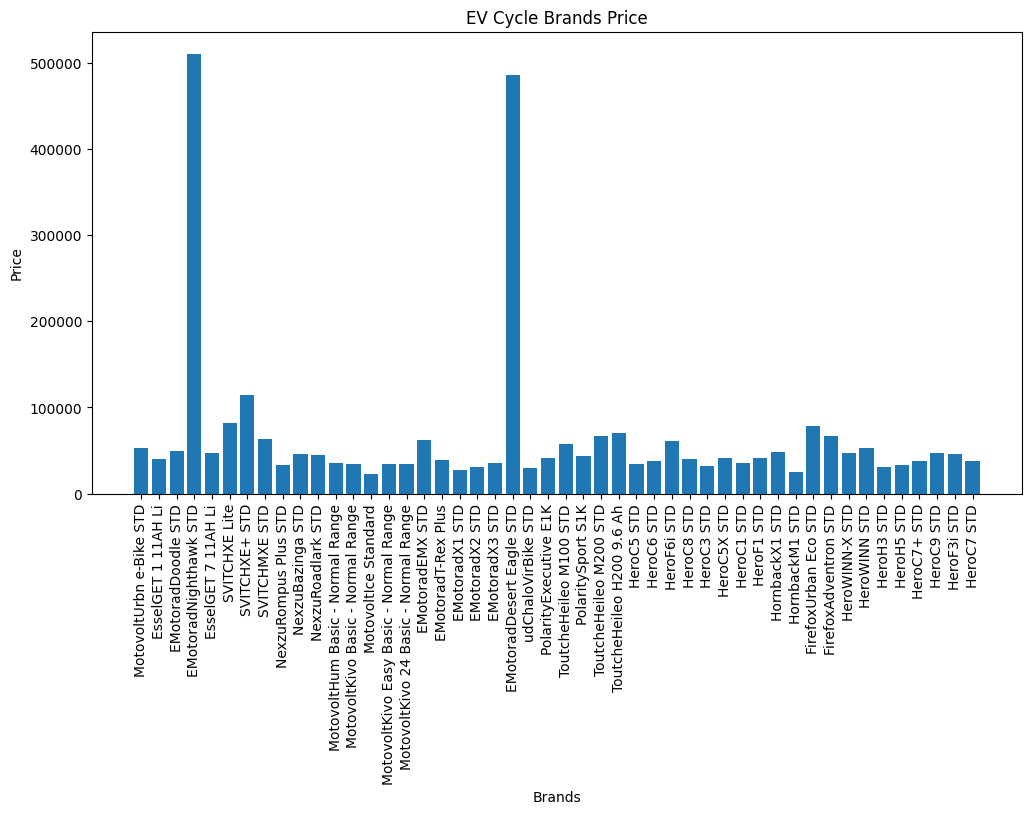

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(data=cycle, height='Price', x='Cycle Name')
plt.title('EV Cycle Brands Price')
plt.xlabel('Brands')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


In [ ]:
cycle.columns

Index(['Name', 'Model', 'Price', 'Ratings', 'Range', 'Wheel Type',
       'Motor Power', 'Motor Type', 'Top Speed', 'Charging Time',
       'Unnamed: 10', 'Cycle Name'],
      dtype='object')

<ipython-input-77-689fce1aa288>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



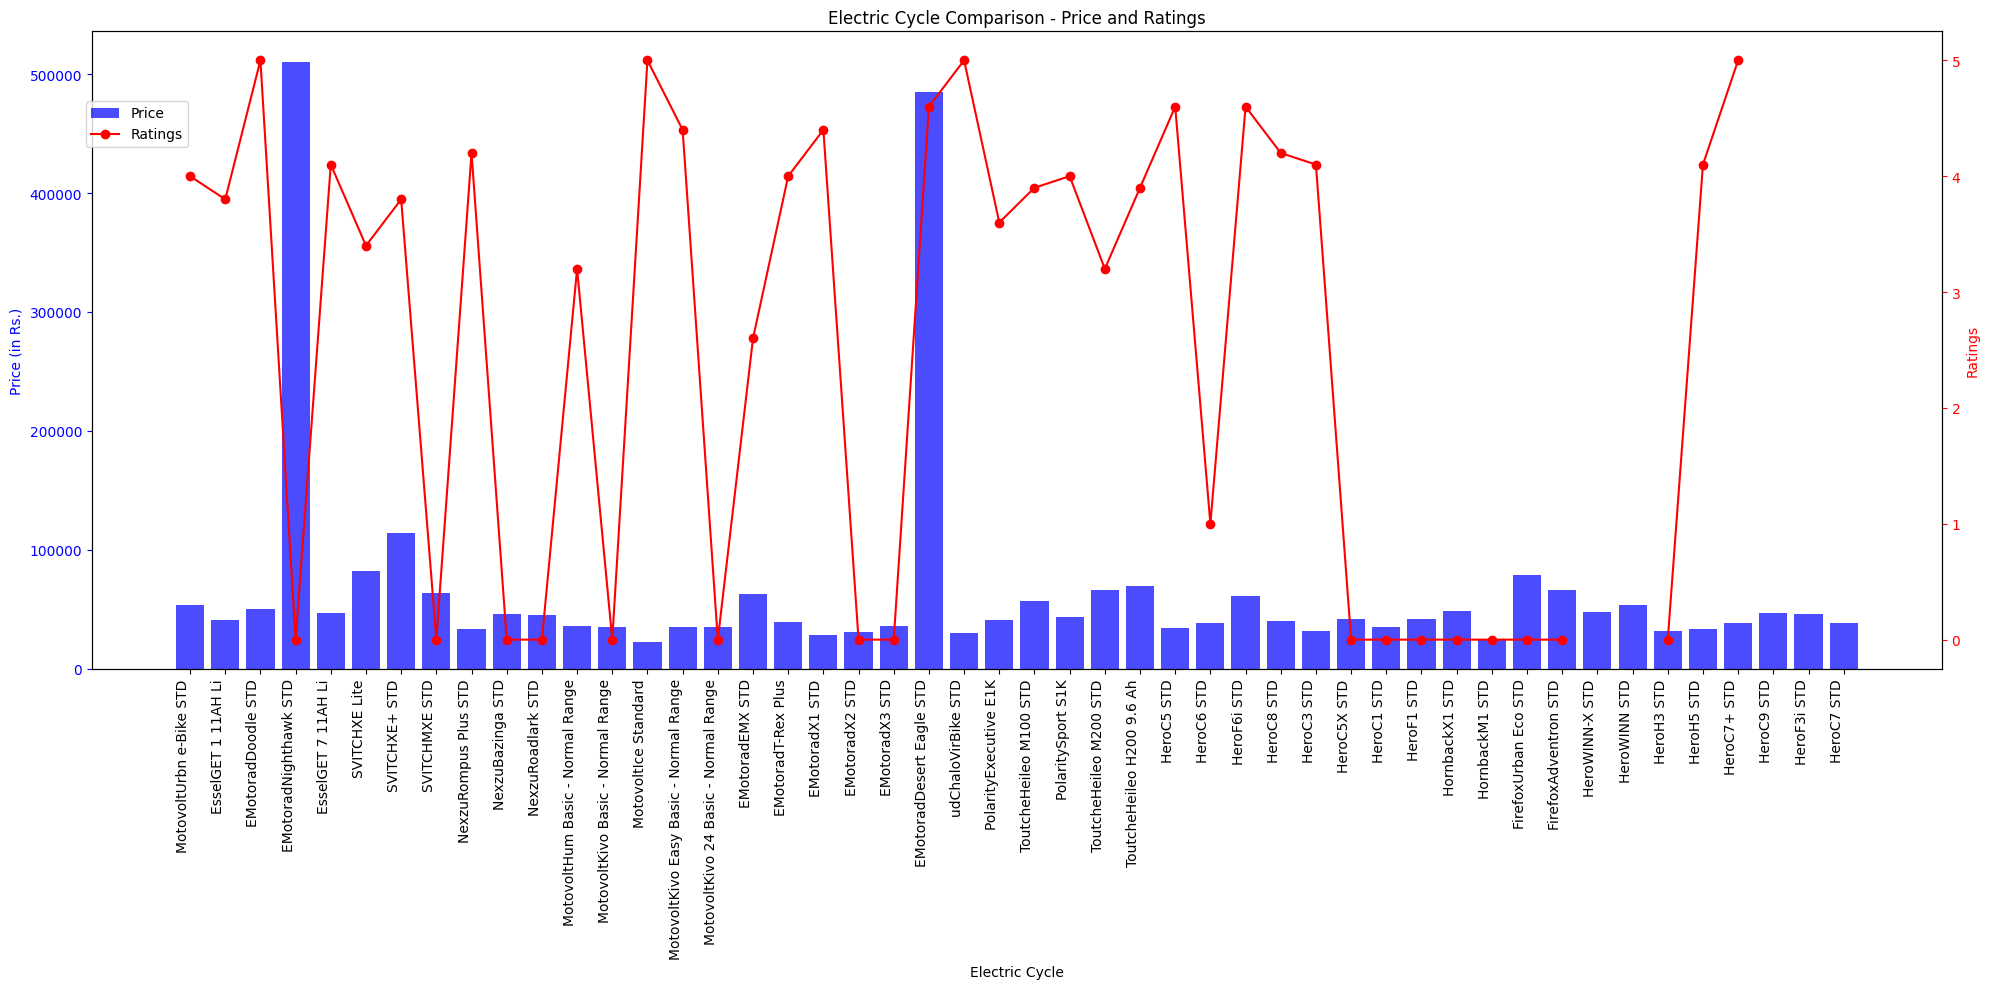

In [ ]:

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.bar(cycle["Cycle Name"], cycle["Price"], color='b', alpha=0.7, label='Price')
ax1.set_xlabel('Electric Cycle')
ax1.set_ylabel('Price (in Rs.)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(cycle["Cycle Name"], rotation=90, ha='right')

ax2 = ax1.twinx()
ax2.plot(cycle["Cycle Name"], cycle["Ratings"], color='r', marker='o', label='Ratings')
ax2.set_ylabel('Ratings', color='r')
ax2.tick_params('y', colors='r')

plt.title('Electric Cycle Comparison - Price and Ratings')
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.1, 0.9))

plt.show()

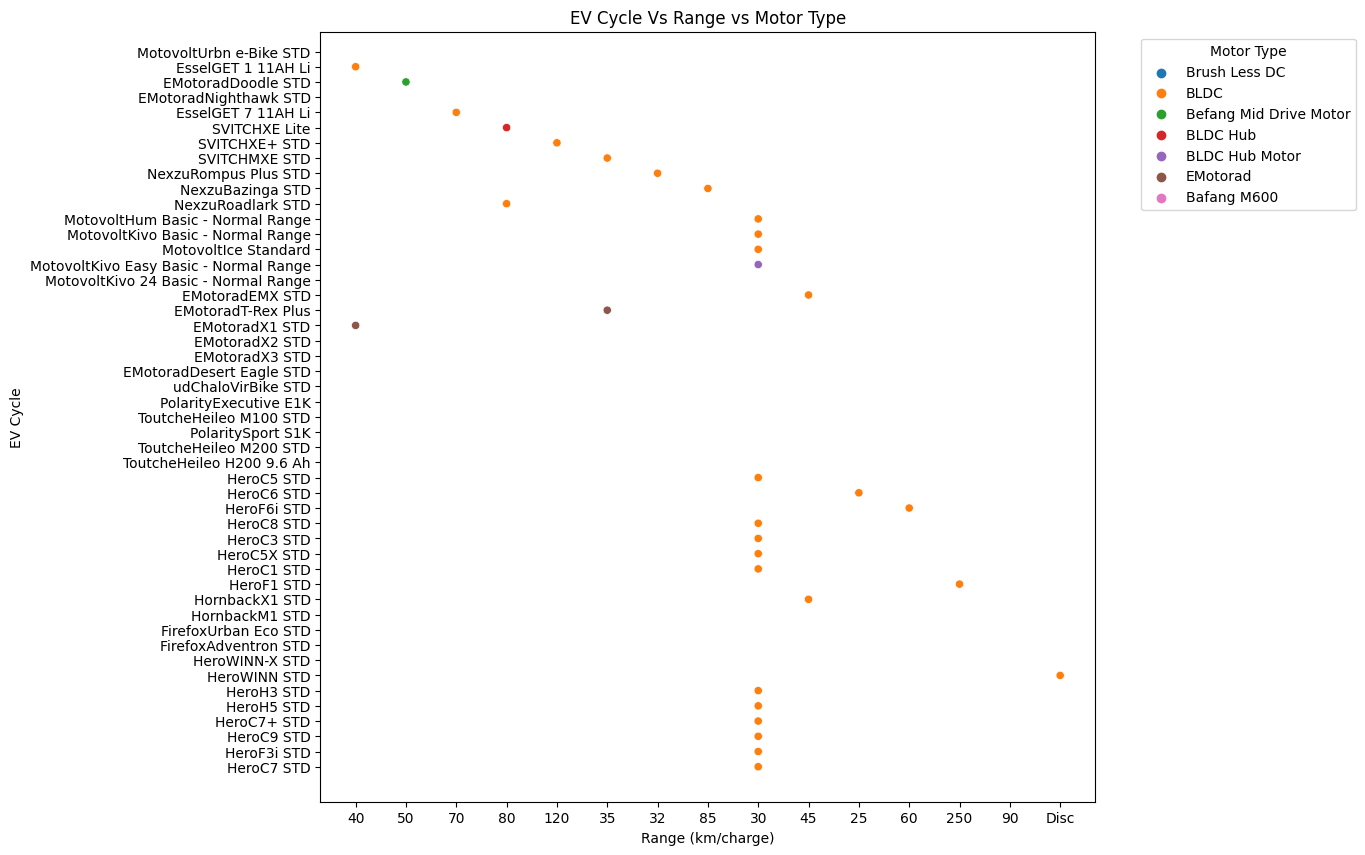

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=cycle, x='Range', y='Cycle Name', hue='Motor Type')
plt.title('EV Cycle Vs Range vs Motor Type')
plt.xlabel('Range (km/charge)')
plt.ylabel('EV Cycle')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Motor Type')
plt.show()

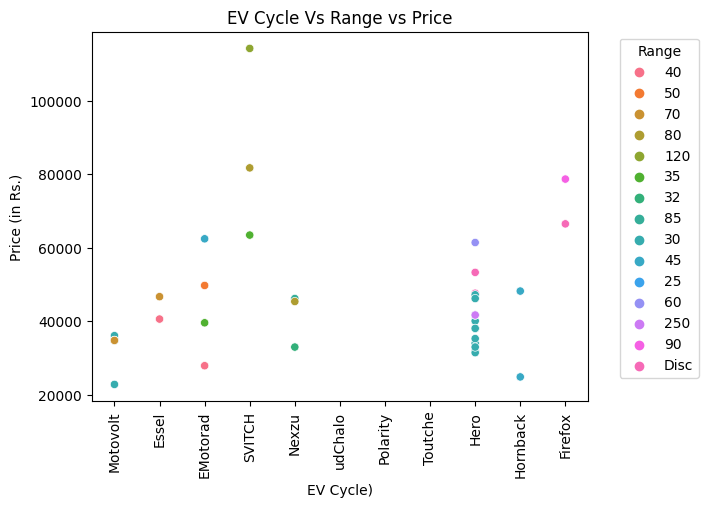

In [ ]:
sns.scatterplot(data=cycle, x=cycle['Name'], y=cycle['Price'], hue='Range')
plt.title('EV Cycle Vs Range vs Price')
plt.xlabel('EV Cycle)')
plt.ylabel('Price (in Rs.)')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Range')
plt.show()

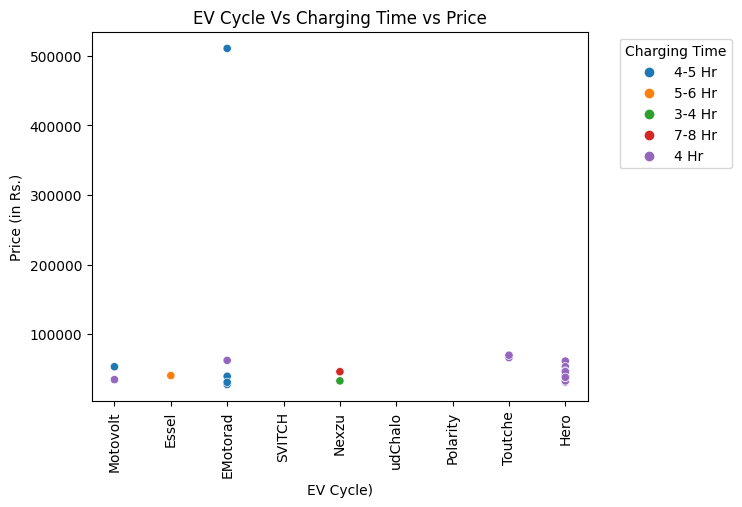

In [ ]:
sns.scatterplot(data=cycle, x=cycle['Name'], y=cycle['Price'], hue='Charging Time')
plt.title('EV Cycle Vs Charging Time vs Price')
plt.xlabel('EV Cycle)')
plt.ylabel('Price (in Rs.)')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Charging Time')
plt.show()

In [ ]:
bike = pd.read_excel('/content/bike data.xlsx')

In [ ]:
bike

,Name,Model,Price,Rating,Ground Clearance,Charging Time,Motor Type,Range,Top Speed,Motor Power,Fuel Type,Batter Capacity
0,Revolt RV400,RV400 STD,"Rs. 1,35,499",4.1/5,Ground Clearance\t\n\n215 mm,Charging Time\t\n\n4.5 Hr,Motor TypeMid Drive,Range\t\n\n150 km/charge,Top Speed\t\n\n85 km/hr,Motor Power\t\n\n3000,Fuel Type\t\n\nElectric,NaN
1,Ultraviolette F77,F77 STD,"Rs. 3,99,632",4.8/5,Ground Clearance\t\n\n160 mm,Charging Time\t\n\n4 Hr,Motor Type\t\n\nPermanent Magnet AC Motor,Range\t\n\n307 km/charge,Top Speed\t\n\n152 km/hr,Motor Power\t\n\n30200,NaN,NaN
2,Oben Rorr,Rorr STD,"Rs. 1,54,898",4.8/5,Ground Clearance\t\n\n230 mm,Charging Time\t\n\n2 Hr,Motor Type\t\n\nIPMSM Motor,Range\t\n\n200 km/charge,Top Speed\t\n\n100 km/hr,Motor Power\t\n\n1000,Fuel Type\t\n\nElectric,NaN
3,Orxa Mantis,Mantis STD,"Rs. 3,79,275",5.0/5,Ground Clearance\t\n\n180 mm,Charging Time\t\n\n2.5 Hours ( 0-80% ),Motor Type\t\n\nBLDC,Range\t\n\n221 km/charge,Top Speed\t\n\n135 km/hr,Motor Power\t\n\n20500,NaN,NaN
4,Joy e-bike Beast,Beast STD,"Rs. 2,49,592",4.4/5,Ground Clearance\t\n\n160 mm,Charging Time\t\n\n9 Hr,Motor Type\t\n\nDC Brushless,Range\t\n\n110 km/charge,Top Speed\t\n\n90 km/hr,Motor Power\t\n\n5000,Fuel Type\t\n\nElectric,Battery Capacity\t\n\n5.18 Kwh
5,Tork Kratos R,Kratos STD,"Rs. 1,86,927",4.5/5,Ground Clearance\t\n\n165 mm,Charging Time\t\n\n6-7 Hr,Motor Type\t\n\nAxial Flux - PM,Range\t\n\n180 km/charge,Top Speed\t\n\n105 km/hr,Motor Power\t\n\n9000,Fuel Type\t\n\nElectric,NaN
6,Komaki Ranger,Ranger STD,"Rs. 1,92,089",4.4/5,NaN,Charging Time\t\n\n6 Hr,NaN,Range\t\n\n200-250 km/charge,NaN,Motor Power\t\n\n4000,Fuel Type\t\n\nElectric,NaN
7,One Electric Motorcycles Kridn,Kridn STD,"Rs. 1,40,682",4.2/5,NaN,NaN,NaN,Range\t\n\n110 km/charge,Top Speed\t\n\n95 km/hr,Motor Power\t\n\n5500,Fuel Type\t\n\nElectric,NaN
8,Matter Aera,Aera 5000,"Rs. 1,83,364",4.6/5,NaN,Charging Time\t\n\n2 Hours,NaN,Range\t\n\n125 km/charge,Top Speed\t\n\n75 km/hr,Motor Power\t\n\n10000,NaN,Battery Capacity\t\n\n5 Kwh
9,PURE EV EcoDryft,EcoDryft STD,"Rs. 1,25,374",4.4/5,Ground Clearance\t\n\n200 mm,Charging Time\t\n\n3 Hr,NaN,Range\t\n\n171 km/charge,Top Speed\t\n\n80 km/hr,Motor Power\t\n\n3000,Fuel Type\t\n\nElectric,NaN


In [ ]:
bike['Price'] = bike['Price'].str.split(' ').str[-1].str.replace(',', '').astype(int)

In [ ]:
bike['Rating'] = bike['Rating'].str.split('/').str[0].str.replace('No one has rated or written review till now','0').str.replace('Based on 8 review','0').str.replace('Based on 3 review','0').str.replace('Based on 5 review','0').str.replace('Based on 2 review','0').str.replace('Based on 1 review','0').str.replace('0s','0').astype('float')

In [ ]:
bike['Range'] =  bike['Range'].str.split('\n').str[-1].str.split(" ").str[0].str.split('-').str[0].fillna(0).astype(int)

In [ ]:
bike['Motor Power'] =  bike['Motor Power'].str.split('\n').str[-1].str.replace('Motor Power','').str.split(" ").str[0].fillna(0).astype(int)

In [ ]:
bike['Motor Type'] = bike['Motor Type'].str.split('\n').str[-1].str.replace('Motor Type','')

In [ ]:
bike['Top Speed'] = bike['Top Speed'].str.split('\n').str[-1].str.split(" ").str[0].astype(float)

In [ ]:
bike['Charging Time'] =  bike['Charging Time'].str.split('\n').str[-1].str.replace('Hours','Hr').str.replace('Minutes','Min')

In [ ]:
bike['Ground Clearance'] = bike['Ground Clearance'].str.split('\n').str[-1].str.replace('mm','').astype(float)

<ipython-input-91-b146298eb95e>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



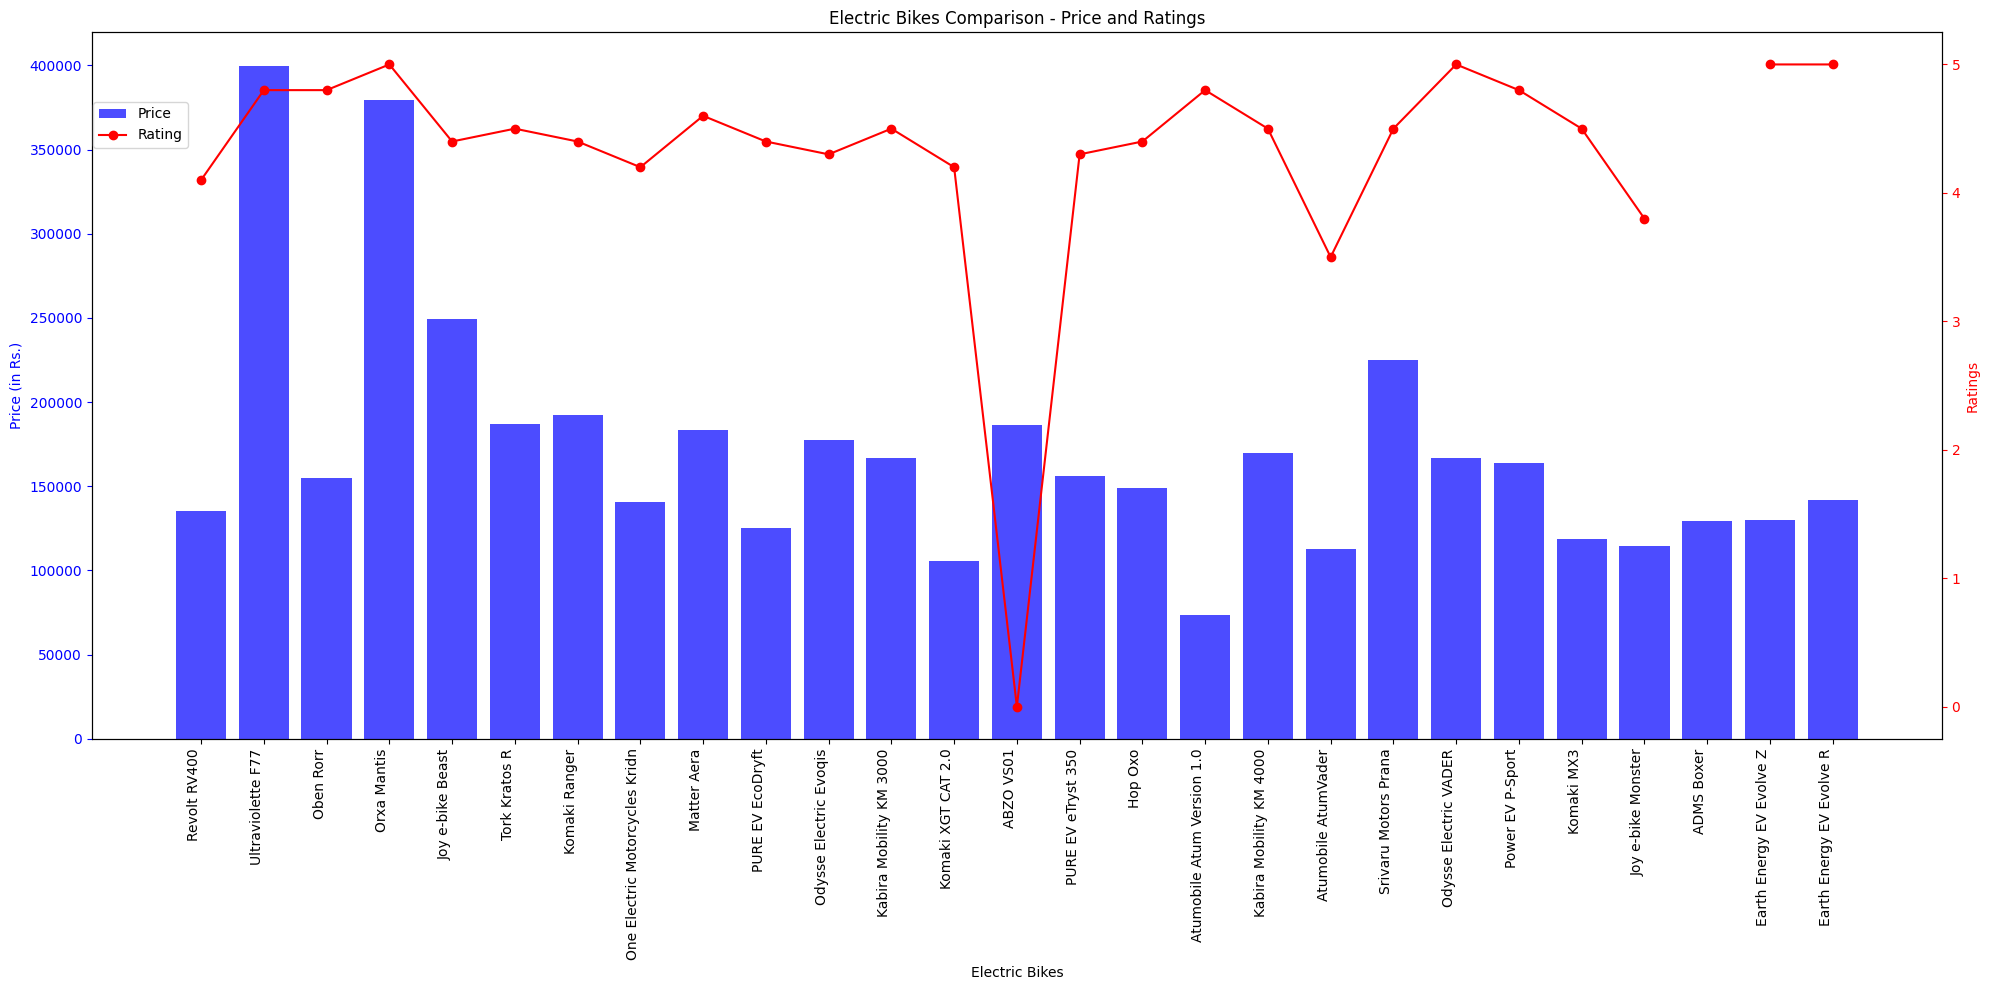

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.bar(bike["Name"], bike["Price"], color='b', alpha=0.7, label='Price')
ax1.set_xlabel('Electric Bikes')
ax1.set_ylabel('Price (in Rs.)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(bike["Name"], rotation=90, ha='right')

ax2 = ax1.twinx()
ax2.plot(bike["Name"], bike["Rating"], color='r', marker='o', label='Rating')
ax2.set_ylabel('Ratings', color='r')
ax2.tick_params('y', colors='r')

plt.title('Electric Bikes Comparison - Price and Ratings')
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.1, 0.9))

plt.show()

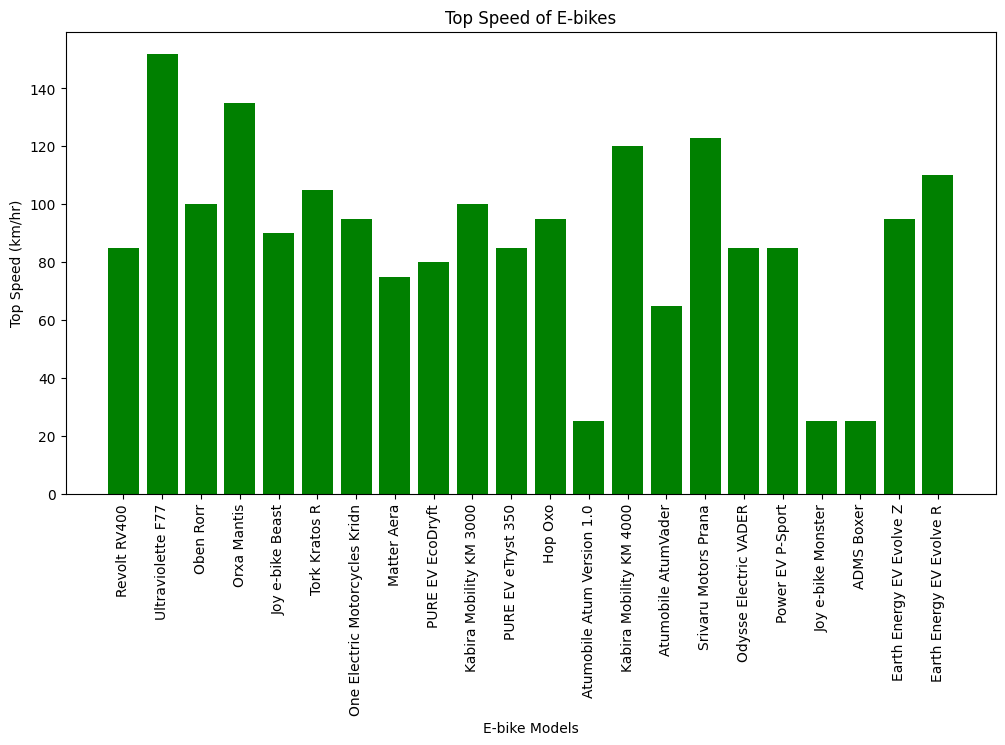

In [ ]:
plt.figure(figsize=(12, 6))
df1 = bike.dropna(subset=['Top Speed'])
plt.bar(df1['Name'], df1['Top Speed'], color='green')
plt.title('Top Speed of E-bikes')
plt.xlabel('E-bike Models')
plt.ylabel('Top Speed (km/hr)')
plt.xticks(rotation=90)
plt.show()

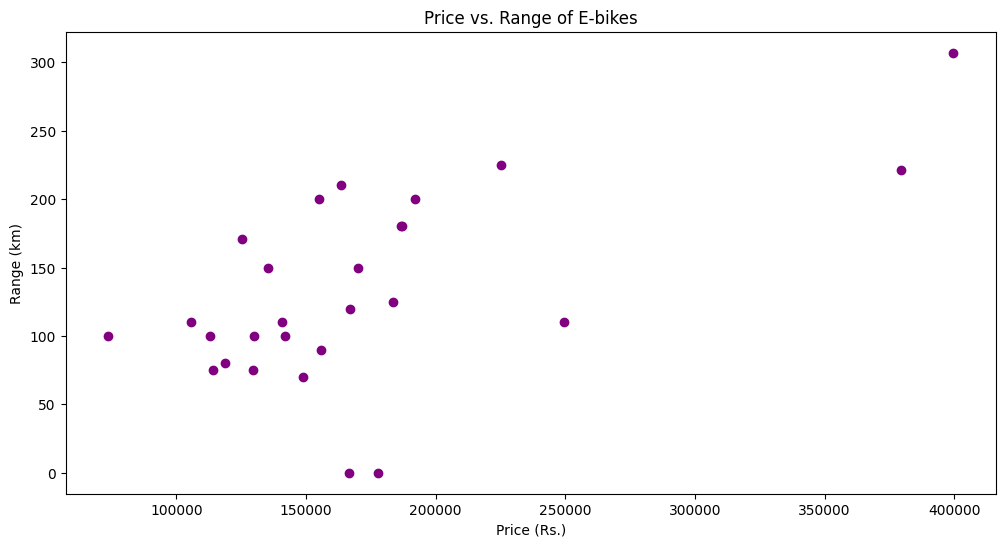

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(bike['Price'], bike['Range'], color='purple')
plt.title('Price vs. Range of E-bikes')
plt.xlabel('Price (Rs.)')
plt.ylabel('Range (km)')
plt.show()

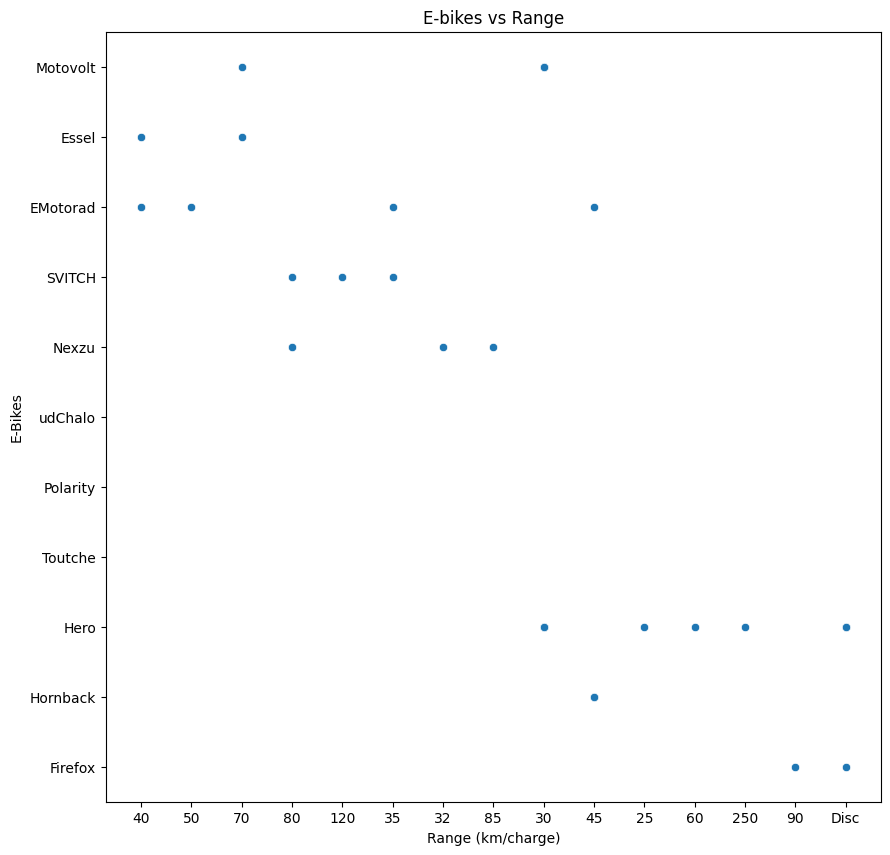

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=cycle, x='Range', y='Name')
plt.title('E-bikes vs Range')
plt.xlabel('Range (km/charge)')
plt.ylabel('E-Bikes')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

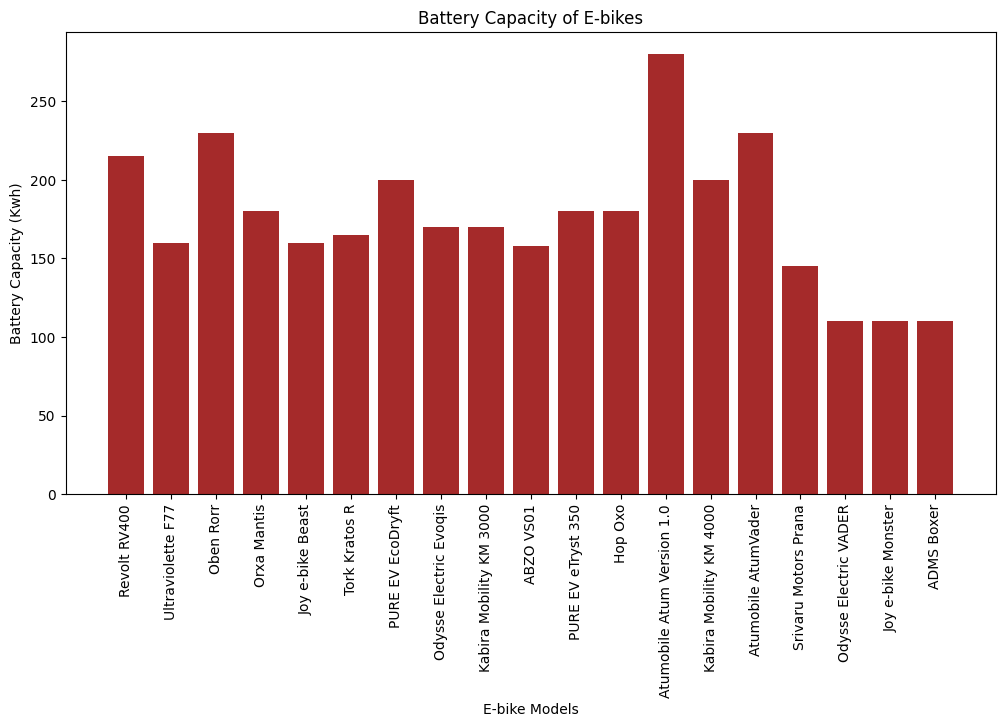

In [ ]:
plt.figure(figsize=(12, 6))
df = bike.dropna(subset=['Ground Clearance'])
plt.bar(df['Name'], df['Ground Clearance'], color='brown')
plt.title('Battery Capacity of E-bikes')
plt.xlabel('E-bike Models')
plt.ylabel('Battery Capacity (Kwh)')
plt.xticks(rotation=90)
plt.show()

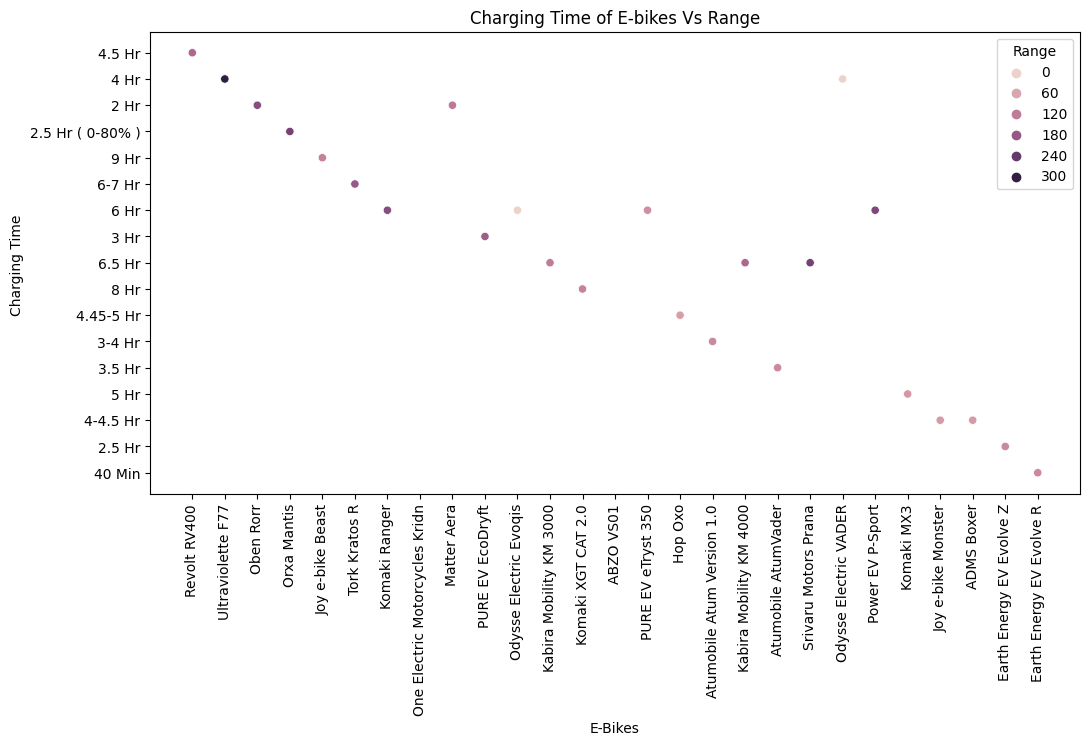

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=bike['Name'], y=bike['Charging Time'],hue=bike['Range'])
plt.title('Charging Time of E-bikes Vs Range')
plt.xlabel('E-Bikes')
plt.ylabel('Charging Time ')
plt.xticks(rotation=90)
plt.show()

In [ ]:
bike

,Name,Model,Price,Rating,Ground Clearance,Charging Time,Motor Type,Range,Top Speed,Motor Power,Fuel Type,Batter Capacity
0,Revolt RV400,RV400 STD,135499,4.1,215.0,4.5 Hr,Mid Drive,150,85.0,3000,Fuel Type\t\n\nElectric,NaN
1,Ultraviolette F77,F77 STD,399632,4.8,160.0,4 Hr,Permanent Magnet AC Motor,307,152.0,30200,NaN,NaN
2,Oben Rorr,Rorr STD,154898,4.8,230.0,2 Hr,IPMSM Motor,200,100.0,1000,Fuel Type\t\n\nElectric,NaN
3,Orxa Mantis,Mantis STD,379275,5.0,180.0,2.5 Hr ( 0-80% ),BLDC,221,135.0,20500,NaN,NaN
4,Joy e-bike Beast,Beast STD,249592,4.4,160.0,9 Hr,DC Brushless,110,90.0,5000,Fuel Type\t\n\nElectric,Battery Capacity\t\n\n5.18 Kwh
5,Tork Kratos R,Kratos STD,186927,4.5,165.0,6-7 Hr,Axial Flux - PM,180,105.0,9000,Fuel Type\t\n\nElectric,NaN
6,Komaki Ranger,Ranger STD,192089,4.4,NaN,6 Hr,NaN,200,NaN,4000,Fuel Type\t\n\nElectric,NaN
7,One Electric Motorcycles Kridn,Kridn STD,140682,4.2,NaN,NaN,NaN,110,95.0,5500,Fuel Type\t\n\nElectric,NaN
8,Matter Aera,Aera 5000,183364,4.6,NaN,2 Hr,NaN,125,75.0,10000,NaN,Battery Capacity\t\n\n5 Kwh
9,PURE EV EcoDryft,EcoDryft STD,125374,4.4,200.0,3 Hr,NaN,171,80.0,3000,Fuel Type\t\n\nElectric,NaN


In [ ]:
bike.rename(columns={'Name': "Brand"}
            , inplace=True)
scooter.rename(columns={'Name': "Brand"}, inplace=True)
cycle.rename(columns={'Name': "Brand"}, inplace=True)
car.rename(columns={'Company Name': "Brand"}, inplace=True)

<ipython-input-98-2e1c38b9bd4d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
bike['Brand'] = bike['Brand'].str.split(' ').str[0:1].str.join(' ')

In [ ]:
arr = []
for i in car['Brand']:
  arr.append('Car')
car['EV Types'] = arr
arr.clear()

arr = []
for i in bike['Brand']:
  arr.append('Bike')
bike['EV Types'] = arr
arr.clear()

arr = []
for i in scooter['Brand']:
  arr.append('Scooter')
scooter['EV Types'] = arr
arr.clear()


arr = []
for i in cycle['Brand']:
  arr.append('Cycle')
cycle['EV Types'] = arr
arr.clear()




<ipython-input-100-002e3f66e493>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
car.columns

Index(['Brand', 'Model', 'Price', 'Rating', 'Battery Capacity',
       'MaxTorque(Nm)', 'MaxPower(bhp)', 'Range', 'Charging Time', 'Combined',
       'EV Types'],
      dtype='object')

In [ ]:
car.rename(columns={'Review': "Rating"}
            , inplace=True)


In [ ]:
car.rename(columns={'Range(km)': "Range"}
            , inplace=True)

In [ ]:
cycle.rename(columns={'Top Speed': "TopSpeed",'Wheel Type':'WheelsType',
                     'Ratings':'Rating'}
            , inplace=True)

<ipython-input-112-d430412e74b1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
bike['Batter Capacity'] = bike['Batter Capacity'].str.split('\n').str[-1].str.split(" ").str[0]

In [ ]:
bike.rename(columns={'Batter Capacity': "Battery Capacity",
                     }
            , inplace=True)

In [ ]:
bike['EV Types'][0]

In [ ]:
electric_vehicle = pd.concat([car[['Brand', 'Model','Price','EV Types','Rating','Charging Time','Battery Capacity','MaxTorque(Nm)','MaxPower(bhp)','Range']],
           bike[['Brand', 'Model','Price','EV Types','Rating','Ground Clearance','Charging Time','Motor Type','Motor Power','Battery Capacity']],
           scooter[['Brand', 'Model','Price','EV Types','Rating','Ground Clearance','Charging Time','Motor Type','TopSpeed','WheelsType','Range',
       'Motor Power', 'Battery Capacity']],
           cycle[['Brand', 'Model','Price','EV Types','Rating', 'Range', 'WheelsType','Motor Power', 'Motor Type', 'TopSpeed', 'Charging Time',]]],
          ignore_index=True)

In [ ]:
electric_vehicle

,Brand,Model,Price,EV Types,Rating,Charging Time,Battery Capacity,MaxTorque(Nm),MaxPower(bhp),Range,Ground Clearance,Motor Type,Motor Power,TopSpeed,WheelsType
0,Tata,Nexon EV Creative Plus,1712807,Car,3.3,Charging Time\t\n\n6H -AC-7.2 kW (10-100%),40.5,205.0,142.68,465,NaN,NaN,NaN,NaN,NaN
1,Tata,Tiago EV XE Base,990758,Car,4.6,Charging Time\t\n\n58 min| DC-25 kW(10-80%),24.0,0.0,0.00,315,NaN,NaN,NaN,NaN,NaN
2,Kia,EV6 GT line,7137900,Car,4.0,Charging Time\t\n\n18 Min (0-80%),77.4,605.0,320.55,708,NaN,NaN,NaN,NaN,NaN
3,Mahindra,XUV400 EV EC,1857178,Car,4.4,Charging Time\t\n\n6H 30 Min-AC-7.2 kW (0-100%),39.4,310.0,147.51,456,NaN,NaN,NaN,NaN,NaN
4,BMW,i7 xDrive60 M Sport,22930880,Car,5.0,NaN,101.7,745.0,536.40,560,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Hero,H5 STD,32951,Cycle,4.1,4 Hr,NaN,NaN,NaN,30,NaN,BLDC,250,25,Spoke
154,Hero,C7+ STD,38032,Cycle,5.0,4 Hr,NaN,NaN,NaN,30,NaN,BLDC,250,25,Spoke
155,Hero,C9 STD,47178,Cycle,NaN,4 Hr,NaN,NaN,NaN,30,NaN,BLDC,250,25,Spoke
156,Hero,F3i STD,46162,Cycle,NaN,4 Hr,NaN,NaN,NaN,30,NaN,BLDC,250,25,Spoke


In [ ]:
electric_vehicle['EV Types'] = electric_vehicle['EV Types'].astype('category')

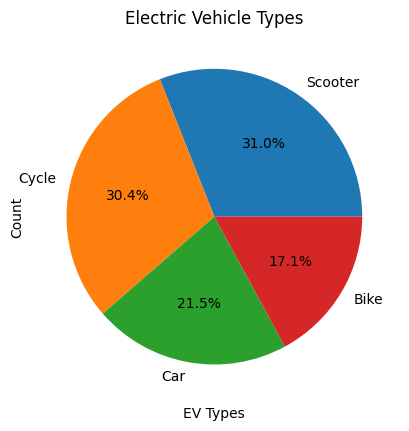

In [ ]:
electric_vehicle['EV Types'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Electric Vehicle Types')
plt.xlabel('EV Types')
plt.ylabel('Count')
plt.show()

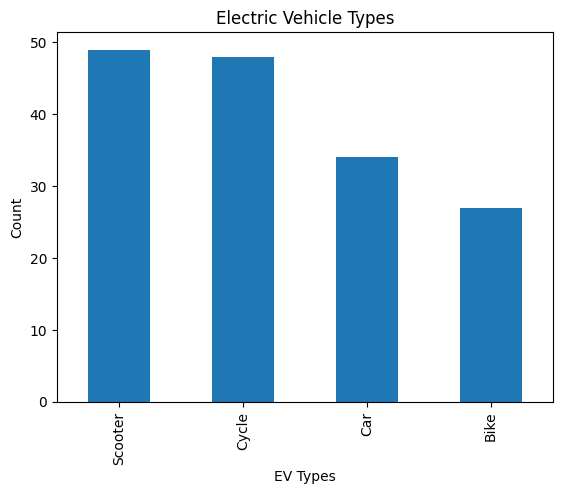

In [ ]:
electric_vehicle['EV Types'].value_counts().plot(kind='bar')
plt.title('Electric Vehicle Types')
plt.xlabel('EV Types')
plt.ylabel('Count')
plt.show()

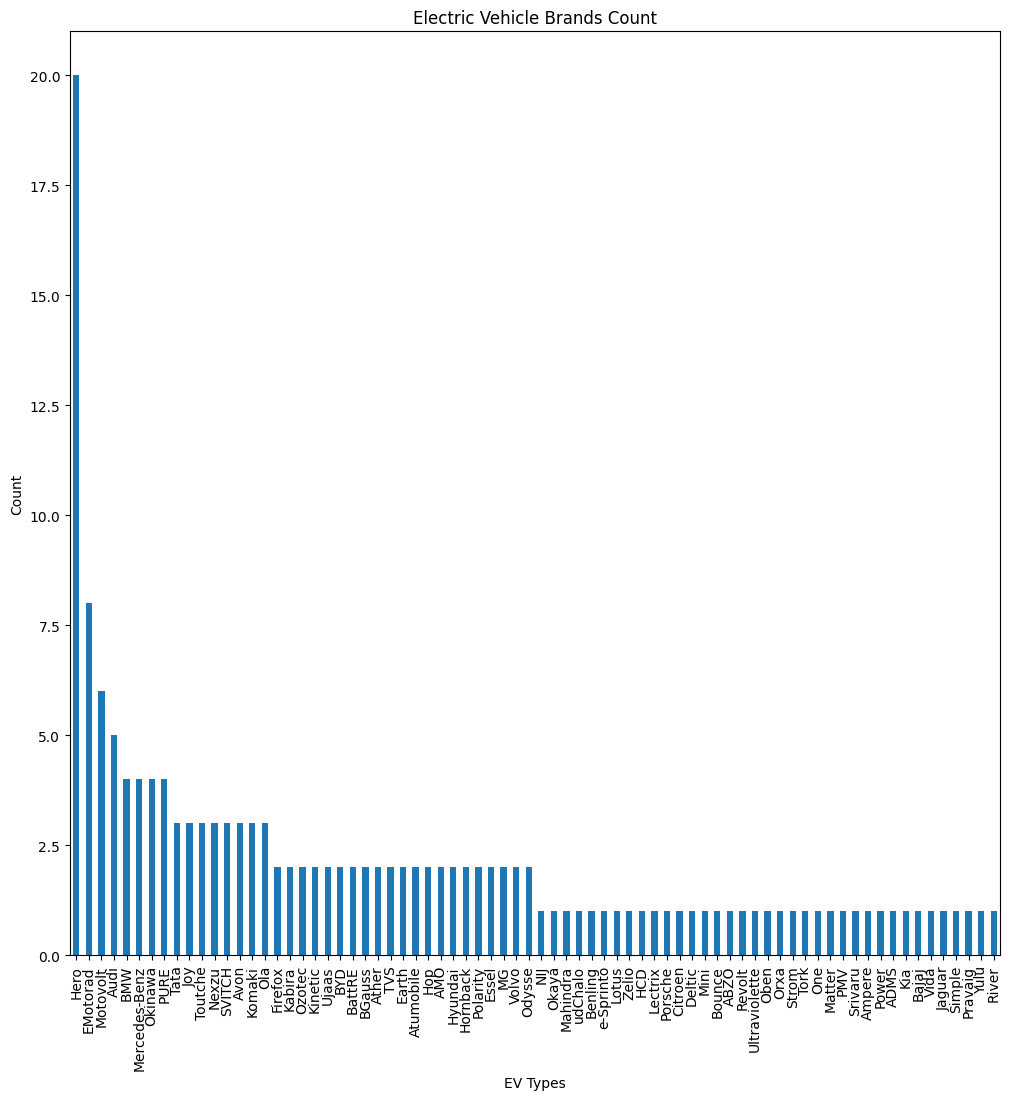

In [ ]:
plt.figure(figsize=(12,12))
counts = electric_vehicle['Brand'].value_counts().plot(kind='bar')
plt.title('Electric Vehicle Brands Count')
plt.xlabel('EV Types')
plt.ylabel('Count')
plt.show()

In [ ]:
len(bike)

27

In [ ]:
len(bike)

In [ ]:
len(scooter)

49

In [ ]:
len(cycle)

48

In [ ]:
len(car)

34

In [ ]:
electric_vehicle['Charging Time'] = electric_vehicle['Charging Time'].str.split('-').str[0].str.replace("Charging Time","").str.strip()

In [ ]:
electric_vehicle = electric_vehicle.fillna(0)

In [157]:
electric_vehicle['TopSpeed'] = electric_vehicle['TopSpeed'].astype(int)

In [162]:
electric_vehicle['Motor Power'] = electric_vehicle['Motor Power'].astype(int)

In [171]:
electric_vehicle['Range'] = electric_vehicle['Range'].str.replace('Disc','0').fillna(0).astype(int)

In [176]:
electric_vehicle['Battery Capacity'] = electric_vehicle['Battery Capacity'].astype(float)

In [177]:
electric_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             158 non-null    int8   
 1   Model             158 non-null    int16  
 2   Price             158 non-null    int64  
 3   EV Types          158 non-null    int8   
 4   Rating            158 non-null    float64
 5   Charging Time     158 non-null    int8   
 6   Battery Capacity  158 non-null    float64
 7   MaxTorque(Nm)     158 non-null    float64
 8   MaxPower(bhp)     158 non-null    float64
 9   Range             158 non-null    int64  
 10  Ground Clearance  158 non-null    float64
 11  Motor Type        158 non-null    int8   
 12  Motor Power       158 non-null    int64  
 13  TopSpeed          158 non-null    int64  
 14  WheelsType        158 non-null    int8   
dtypes: float64(5), int16(1), int64(4), int8(5)
memory usage: 12.3 KB


In [142]:
electric_vehicle['Brand'] = pd.Categorical(electric_vehicle['Brand'])
electric_vehicle['Brand'] = electric_vehicle['Brand'].cat.codes

In [144]:
electric_vehicle['Model'] = pd.Categorical(electric_vehicle['Model'])
electric_vehicle['Model'] = electric_vehicle['Model'].cat.codes

In [145]:
electric_vehicle['EV Types'] = pd.Categorical(electric_vehicle['EV Types'])
electric_vehicle['EV Types'] = electric_vehicle['EV Types'].cat.codes

In [146]:
electric_vehicle['Charging Time'] = pd.Categorical(electric_vehicle['Charging Time'])
electric_vehicle['Charging Time'] = electric_vehicle['Charging Time'].cat.codes

In [158]:
electric_vehicle['Motor Type'] = pd.Categorical(electric_vehicle['Motor Type'])
electric_vehicle['Motor Type'] = electric_vehicle['Motor Type'].cat.codes

In [159]:
electric_vehicle['WheelsType'] = pd.Categorical(electric_vehicle['WheelsType'])
electric_vehicle['WheelsType'] = electric_vehicle['WheelsType'].cat.codes

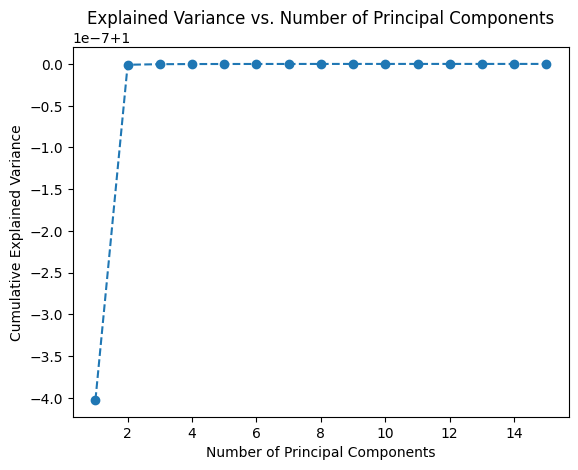

In [179]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(electric_vehicle)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()

In [180]:
print("Standard Deviation:", pca.explained_variance_)
print("Proportion of Variance:", pca.explained_variance_ratio_)
print("Cumulative Proportion:", pca.explained_variance_ratio_.cumsum())

Standard Deviation: [2.98829569e+13 1.20016323e+07 2.00289778e+04 5.15113352e+03
 2.04140760e+03 7.47140422e+02 5.53534463e+02 5.07397823e+02
 3.37372229e+02 1.62917581e+02 7.64040901e+01 1.77465075e+01
 2.82615155e+00 1.42613413e+00 4.60241042e-01]
Proportion of Variance: [9.99999597e-01 4.01621149e-07 6.70247253e-10 1.72376899e-10
 6.83134132e-11 2.50022153e-11 1.85234093e-11 1.69794984e-11
 1.12897828e-11 5.45185391e-12 2.55677708e-12 5.93866948e-13
 9.45739883e-14 4.77239774e-14 1.54014497e-14]
Cumulative Proportion: [0.9999996 1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.       ]


In [183]:
comp = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, comp)))
loadings_df['Variables'] = electric_vehicle.columns.values
loadings_df = loadings_df.set_index('Variables')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Variables,,,,,,,,,,,,,,,
Brand,-4.801284e-07,0.001173,-0.005892,-2.125226e-02,-0.128380,-6.766727e-02,-5.864695e-02,-8.438078e-04,9.707942e-01,-1.792398e-01,0.014930,-1.082252e-03,1.344154e-02,-6.171282e-03,8.165539e-04
Model,5.399648e-07,0.000146,-0.045738,6.624609e-02,-0.986673,-1.220473e-02,5.077424e-02,3.647490e-02,-1.197891e-01,3.954111e-02,0.000202,-4.227100e-03,4.371827e-04,-2.505089e-03,7.488540e-04
Price,1.000000e+00,0.000098,0.000040,-4.895176e-07,-0.000001,-2.214361e-07,2.658923e-07,2.991433e-06,3.367119e-07,-7.870766e-07,-0.000002,-9.585328e-08,-1.235607e-07,-3.283621e-08,-1.319395e-08
EV Types,-5.246634e-08,-0.000061,0.001275,1.203006e-03,-0.000169,1.176056e-02,-2.648694e-02,3.451107e-03,5.742476e-04,1.055595e-02,-0.010439,-1.402735e-02,-1.080604e-02,-9.935999e-03,9.992558e-01
Rating,-1.800625e-08,0.000096,-0.002258,4.866001e-03,-0.000634,-1.470539e-02,-6.202738e-03,-9.527855e-03,2.349036e-03,-2.605838e-02,0.005322,3.813357e-02,-8.562027e-01,-5.139979e-01,-1.346662e-02
Charging Time,-2.349556e-07,0.000261,-0.003463,3.743496e-02,-0.018635,-1.740353e-02,-3.673322e-02,-8.345196e-02,-1.862828e-01,-9.756601e-01,0.041777,1.807600e-02,2.778692e-02,6.693085e-03,1.094655e-02
Battery Capacity,5.207712e-06,-0.000515,-0.076460,-4.218597e-03,0.012328,-7.563971e-02,2.207868e-02,1.101789e-01,-1.149520e-02,3.693455e-02,0.984866,5.477924e-02,2.162269e-02,-2.385794e-02,1.187018e-02
MaxTorque(Nm),3.345490e-05,-0.003718,-0.866442,6.357318e-02,0.062949,-4.082920e-02,4.229182e-02,4.700693e-01,-1.248812e-03,-4.184933e-02,-0.122810,-1.563098e-03,-1.250604e-03,-9.171495e-04,1.331347e-04
MaxPower(bhp),2.237671e-05,-0.001902,-0.482821,5.156923e-02,-0.010880,1.565728e-01,-9.257968e-02,-8.485095e-01,1.455594e-02,7.748880e-02,0.069217,-5.846126e-04,4.377607e-03,4.530049e-03,-8.337273e-04
